## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [96]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [97]:
# წავიკითხოთ csv ფაილი და გამოვიტანოთ საწყისი მონაცემები
data = pd.read_csv("/LoanStatus.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y


In [98]:
# ინფორმაცია იმის შესახებ თუ რა სვეტები გვაქვს
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [99]:
# ინფორმაცია ჩანაწერებზე - რაოდენობა, ტიპები..
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Gender            601 non-null    object 
 2   Married           611 non-null    object 
 3   Dependents        599 non-null    object 
 4   Education         614 non-null    object 
 5   Self_Employed     582 non-null    object 
 6   ApplicantIncome   614 non-null    int64  
 7   LoanAmount        592 non-null    float64
 8   Loan_Amount_Term  600 non-null    float64
 9   Credit_History    564 non-null    float64
 10  Property_Area     614 non-null    object 
 11  Loan_Status       614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [100]:
# აღწერილობითი სტატისტიკა (ჩანაწერების რაოდენობა, საშუალო, სტანდარტული გადახრა, მინიმალური, მაქსიმალური..) რიცხვითი სვეტებისათვის
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.0,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.0,1.0


In [101]:
# თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა

data.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [102]:
# სესხის აღების ალბათობა = დადასტურებული სესხების რიცხვი / სესხების მთელი რაოდენობა
total_loans = len(data)  # სესხების მთელი რაოდენობა (როგორც დადასტურებული ისე დაუდასტურებელი)
approved_loans = data['Loan_Status'].value_counts()['Y']  # დადასტურებული სესხების რაოდენობა
probability_loan_approval = approved_loans / total_loans  # სესხის აღების ალბათობა
print(f'სესხის აღების ალბათობა: {probability_loan_approval}')


სესხის აღების ალბათობა: 0.6872964169381107


In [103]:
# სესხის მიღების ალბათობა კარგი საკრედიტო ისტორიის დროს =
# = დადასტურებული სესხების რაოდენობა კარგი საკრედიტო ისტორიის დროს / მთლიანად გაცემული სესხების რაოდენობა კარგი საკრედიტო ისტორიის დროს
good_credits = data[data['Credit_History'] == 1]  # გავფილტროთ სესხები კარგი საკრედიტო ისტორიით
total_good_credit_loans = len(good_credits)  # მთელი რაოდენობა სესხებისა კარგი საკრედიტო ისტორიით
approved_good_credit_loans = good_credits['Loan_Status'].value_counts()['Y']  # დადასტურებული სესხების რაოდენობა
probability_good_credit_approval = approved_good_credit_loans / total_good_credit_loans
print(f'სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს: {probability_good_credit_approval}')

სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს: 0.7957894736842105


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

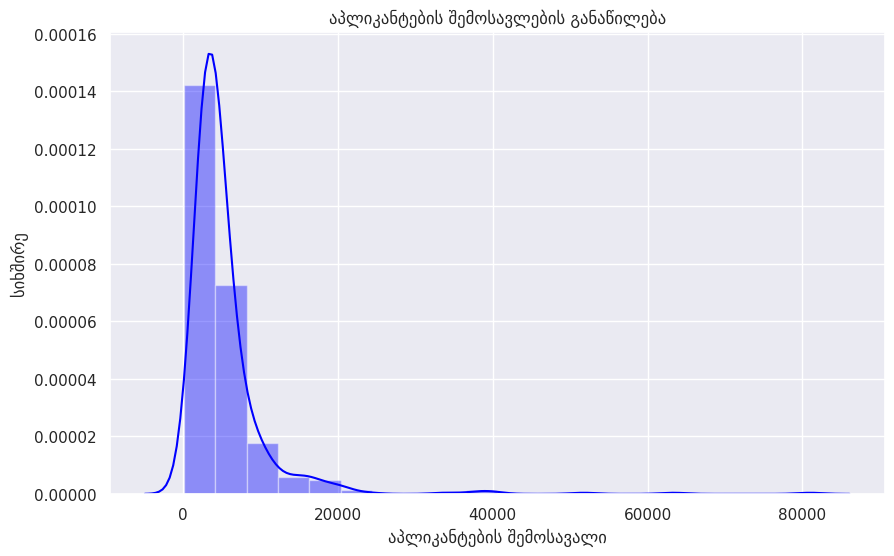

In [105]:
# აპლიკანტების შემოსავლების განაწილების გრაფიკი
sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.distplot(data['ApplicantIncome'], kde=True,bins=20, color='blue')
plt.title('აპლიკანტების შემოსავლების განაწილება')
plt.xlabel('აპლიკანტების შემოსავალი')
plt.ylabel('სიხშირე')
plt.show()

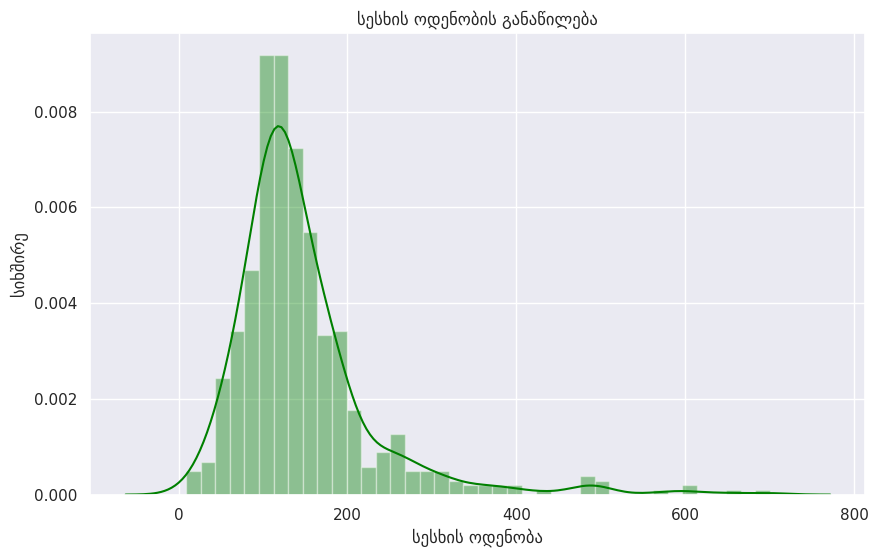

In [106]:
# სესხის ოდენობის განაწილება
plt.figure(figsize=(10, 6))
sns.distplot(data['LoanAmount'].dropna(), kde=True, bins=40, color='green') # დავდროპოთ NaN ველიუები dropna()-ს გამოყენებით
plt.title('სესხის ოდენობის განაწილება')
plt.xlabel('სესხის ოდენობა')
plt.ylabel('სიხშირე')
plt.show()


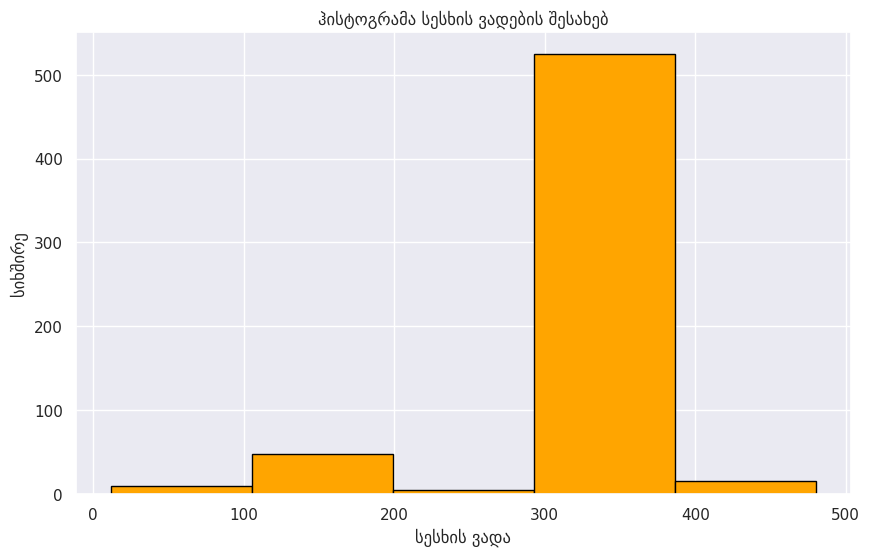

In [107]:
# ჰისტოგრამა სესხის ვადების შესახებ 5 სვეტით
plt.figure(figsize=(10, 6))
plt.hist(data['Loan_Amount_Term'].dropna(), bins=5, color='orange', edgecolor='black')
plt.title('ჰისტოგრამა სესხის ვადების შესახებ')
plt.xlabel('სესხის ვადა')
plt.ylabel('სიხშირე')
plt.grid(True)
plt.show()


## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [108]:
from scipy.stats import norm

In [109]:
# პირველ რიგში გამოვითვალოთ აპლიკანტების საშუალო შემოსავალი და სტანდარტული გადახრა numpy-ის დახმარებით
import numpy as np

ApplicantIncome_data = data['ApplicantIncome']

mean_income = np.mean(ApplicantIncome_data)

std_dev_income = np.std(ApplicantIncome_data)

print(f'საშუალო შემოსავალი: {mean_income}')
print(f'სტანდარტული გადახრა: {std_dev_income}')


საშუალო შემოსავალი: 5403.459283387622
სტანდარტული გადახრა: 6104.0648565338915


In [110]:
limit_value = 2000  # შემოსავლების ლიმიტი - 2000 ევრო

# გამოვთვალოთ კომულაციური ალბათობა norm.cdf()-ის გამოყენებით
cumulative_prob = norm.cdf(limit_value, mean_income, std_dev_income)

# კომულაციური ალბათობა გადავიყვანოთ პროცენტებში
percentage = cumulative_prob * 100
percentage_rounded = round(percentage, 2) # დავამრგვალოთ პროცენტის მნიშვნელობა მეასედებამდე სიზუსტით (რადგან ძალიან დიდი float რიცხვია)

print(f'კლიენტების {percentage_rounded}%-ს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად')

კლიენტების 28.86%-ს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

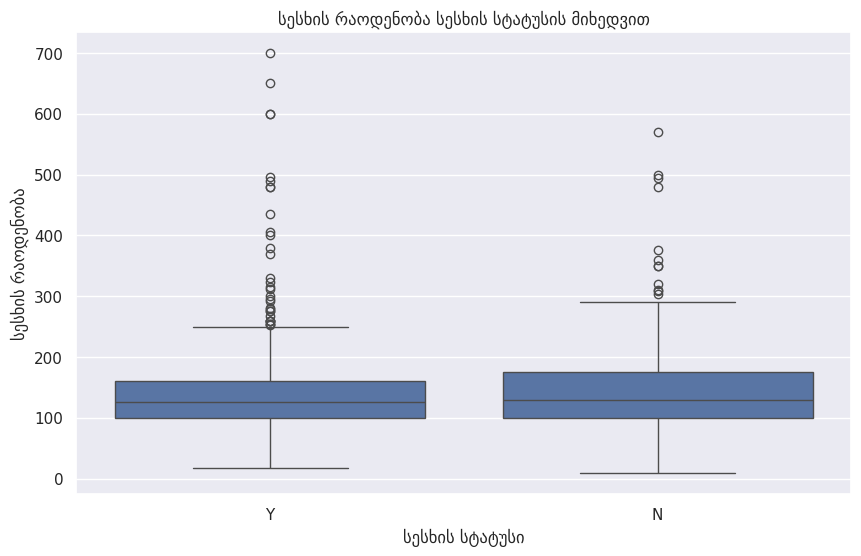

In [111]:
# პირველი boxplot - სესხის ოდენობისა და სესხის სტატუსის დამოკიდებულება
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=data)
plt.title('სესხის რაოდენობა სესხის სტატუსის მიხედვით')
plt.xlabel('სესხის სტატუსი')
plt.ylabel('სესხის რაოდენობა')
plt.show()

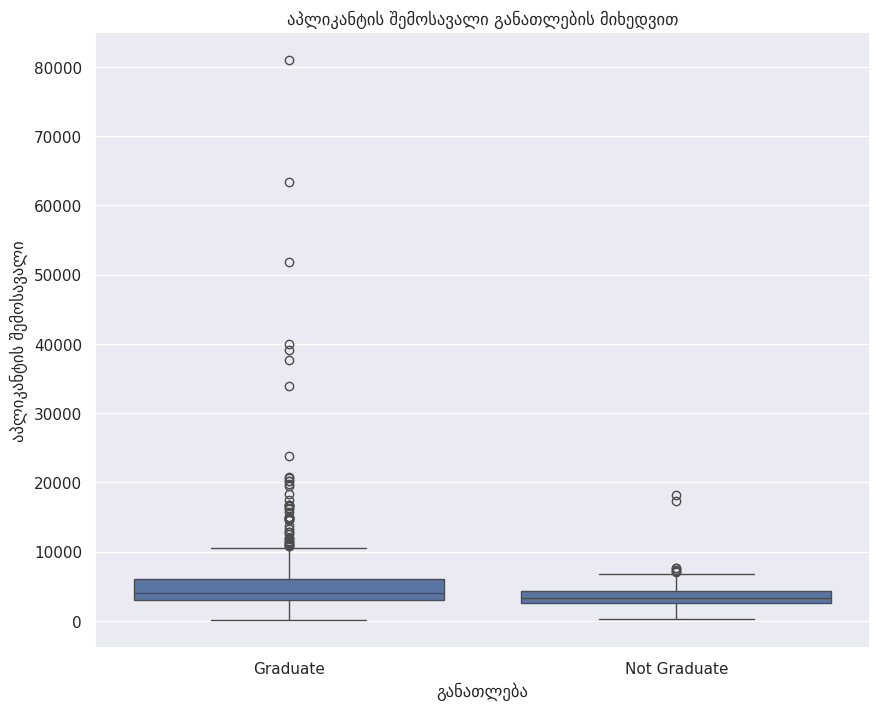

In [112]:
# მეორე boxplot - განათლებისა და შემოსავლის დამოკიდებულება
plt.figure(figsize=(10, 8))
sns.boxplot(x='Education', y='ApplicantIncome', data=data)
plt.title('აპლიკანტის შემოსავალი განათლების მიხედვით')
plt.xlabel('განათლება')
plt.ylabel('აპლიკანტის შემოსავალი')
plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [113]:
from scipy.stats import ttest_1samp,ttest_ind

In [114]:

# განვსაზღვროთ მონაცემთა პოპულაციის საშუალო შედარებისათვის (ამ შემთხვევაში ეს იქნება ნულოვანი ჰიპოთეზა)
population_mean = 5000  # ჩენი ნულოვანი ჰიპოთეზაა რომ პოპულაციის საშუალო არის  5000
                        # ხოლო ალტერნატიული კი - პოპულაციის საშუალო არ არის 5000

# გავუშვათ one-sample t-test 'ApplicantIncome' ჩანაწერებზე
t_statistic, p_value = ttest_1samp(data['ApplicantIncome'].dropna(), population_mean)

# ალფა (α) არის მნიშვნელოვნების დონე, რომელიც წარმოადგენს ნულოვანი ჰიპოთეზის უარყოფის ალბათობის ზღვარს(ამ შემთხვევაში 0.05)
alpha = 0.05
# p-მნიშვნელობა გვეხმარება განვსაზღვროთ, იძლევა თუ არა დაკვირვებული მონაცემები საკმარის მტკიცებულებას ნულოვანი ჰიპოთეზის
# უარსაყოფად და ალტერნატიული ჰიპოთეზის მხარდასაჭერად.
print(f'p_value={p_value}')
# ჰიპოთეზის ტესტირებისას ჩვენ ვადარებთ p-მნიშვნელობის დონეს ალფას, რათა მივიღოთ გადაწყვეტილება ნულოვანი ჰიპოთეზის შესახებ:
# თუ p-მნიშვნელობა ნაკლებია ან ტოლია ალფაზე (p ≤ α), ჩვენ უარვყოფთ ნულოვანი ჰიპოთეზას.
# თუ p-მნიშვნელობა ალფაზე მეტია (p > α), ჩვენ ვერ უარვყოფთ ნულოვანი ჰიპოთეზას.

# შედეგების ინტეპრეტაცია
if p_value <= alpha:
    print("ნულოვანი ჰიპოთეზის უარყოფა და ალტერნატიულის მიღება: ნიმუშის საშუალო მაჩვენებელი განსხვავდება მითითებული პოპულაციის საშუალოსგან.")
else:
    print("ნულოვანი ჰიპოთეზის უარყოფა ვერ მოხერხდა: ნიმუშის საშუალო ტოლია მითითებული პოპულაციის საშუალოსი.")


p_value=0.10225234862970932
ნულოვანი ჰიპოთეზის უარყოფა ვერ მოხერხდა: ნიმუშის საშუალო ტოლია მითითებული პოპულაციის საშუალოსი.


In [115]:

# შევადაროთ აპლიკანტის შემოსავალი ორ ჯგუფს შორის სესხის სტატუსის საფუძველზე.
# ნულოვანი ჰიპოთეზა: არ არის მნიშვნელოვანი განსხვავება საშუალო აპლიკანტის შემოსავალში კლიენტებს შორის,
# რომელთა სესხის განაცხადი დამტკიცდადა მათ, ვისი განაცხადიც არ დაკმაყოფილდა.
# ალტერნატიული ჰიპოთეზა: ორ ჯგუფს შორის არის მნიშვნელოვანი განსხვავება საშუალო აპლიკანტის შემოსავალში
group1 = data[data['Loan_Status'] == 'Y']['ApplicantIncome'].dropna()
group2 = data[data['Loan_Status'] == 'N']['ApplicantIncome'].dropna()

# გავუშვათ two-sample t-test
t_statistic, p_value = ttest_ind(group1, group2)

# ალფა (α) არის მნიშვნელოვნების დონე, რომელიც წარმოადგენს ნულოვანი ჰიპოთეზის უარყოფის ალბათობის ზღვარს(ამ შემთხვევაში 0.1)
alpha = 0.1

print(f'p_value={p_value}')

# შედეგების ინტეპრეტაცია
if p_value < alpha:
    print("ნულოვანი ჰიპოთეზის უარყოფა: ნიმუშის საშუალო მაჩვენებელი განსხვავდება მითითებული პოპულაციის საშუალოსგან.")
else:
    print("ნულოვანი ჰიპოთეზის უარყოფა ვერ მოხერხდა: ნიმუშის საშუალო ტოლია მითითებული პოპულაციის საშუალოსი.")


p_value=0.907287812130518
ნულოვანი ჰიპოთეზის უარყოფა ვერ მოხერხდა: ნიმუშის საშუალო ტოლია მითითებული პოპულაციის საშუალოსი.


In [1]:
# Data is loaded from the 'imdb_top_2000_movies.csv' file into a pandas DataFrame named 'df'.
import pandas as pd
data_csv = 'imdb_top_2000_movies.csv'
df = pd.read_csv(data_csv)
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,"66,235","Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,$11.00M
1996,Tooth Fairy,I 2010,101,5.0,36.0,"49,527","Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,$60.02M
1997,The Informant!,2009,108,6.5,66.0,"67,318","Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,$33.31M
1998,Youth in Revolt,2009,90,6.4,63.0,"75,956","Comedy, Drama, Romance",Miguel Arteta,Michael Cera,$15.28M


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    2000 non-null   object 
 1   Release Year  2000 non-null   object 
 2   Duration      2000 non-null   int64  
 3   IMDB Rating   2000 non-null   float64
 4   Metascore     1919 non-null   float64
 5   Votes         2000 non-null   object 
 6   Genre         2000 non-null   object 
 7   Director      2000 non-null   object 
 8   Cast          2000 non-null   object 
 9   Gross         1903 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 156.4+ KB


In [3]:
df.columns

Index(['Movie Name', 'Release Year', 'Duration', 'IMDB Rating', 'Metascore',
       'Votes', 'Genre', 'Director', 'Cast', 'Gross'],
      dtype='object')

In [4]:
# Selects the 'IMDB Rating' and 'Gross' columns from the DataFrame 
df[['IMDB Rating', 'Gross']]

,IMDB Rating,Gross
0,9.2,$134.97M
1,9.0,$57.30M
2,7.7,$54.80M
3,8.3,$44.82M
4,7.4,NaN
...,...,...
1995,7.2,$11.00M
1996,5.0,$60.02M
1997,6.5,$33.31M
1998,6.4,$15.28M


In [5]:
df.describe()

,Duration,IMDB Rating,Metascore
count,2000.000000,2000.000000,1919.000000
mean,113.939000,6.922600,61.044294
std,22.946035,0.955618,17.937722
min,50.000000,1.500000,9.000000
25%,98.000000,6.400000,48.000000
50%,110.000000,7.000000,61.000000
75%,125.000000,7.600000,74.000000
max,271.000000,9.300000,100.000000


In [6]:
# setting the 'Release Year' column as the index.
df_index_col = pd.read_csv(data_csv, index_col='Release Year')
df_index_col

,Movie Name,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
Release Year,,,,,,,,,
1972,The Godfather,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1974,The Godfather Part II,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
1980,Ordinary People,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
1962,Lawrence of Arabia,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
1971,Straw Dogs,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN
...,...,...,...,...,...,...,...,...,...
2009,The Young Victoria,105,7.2,64.0,"66,235","Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,$11.00M
I 2010,Tooth Fairy,101,5.0,36.0,"49,527","Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,$60.02M
2009,The Informant!,108,6.5,66.0,"67,318","Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,$33.31M


In [7]:
# Sorts the DataFrame 'df_index_col' by the index (Release Year) in ascending order.
df_index_col.sort_index(ascending=True)

,Movie Name,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
Release Year,,,,,,,,,
1921,The Kid,68,8.2,NaN,"134,277","Comedy, Drama, Family",Charles Chaplin,Charles Chaplin,$5.45M
1925,The Gold Rush,95,8.1,NaN,"118,245","Adventure, Comedy, Drama",Charles Chaplin,Charles Chaplin,$5.45M
1926,The General,78,8.1,NaN,"97,801","Action, Adventure, Comedy",Clyde Bruckman,Buster Keaton,$1.03M
1927,Metropolis,153,8.3,98.0,"184,838","Drama, Sci-Fi",Fritz Lang,Brigitte Helm,$1.24M
1931,M - Eine Stadt sucht einen Mörder,117,8.3,NaN,"167,883","Crime, Mystery, Thriller",Fritz Lang,Peter Lorre,$0.03M
...,...,...,...,...,...,...,...,...,...
I 2010,Alice in Wonderland,108,6.4,53.0,"439,658","Adventure, Family, Fantasy",Tim Burton,Mia Wasikowska,$334.19M
I 2010,Grown Ups,102,6.0,30.0,"274,486",Comedy,Dennis Dugan,Adam Sandler,$162.00M
II 2004,Shutter,97,7.0,NaN,"48,945","Horror, Mystery, Thriller",Banjong Pisanthanakun,Parkpoom Wongpoom,NaN


In [8]:
# Counts the number of missing values (NaN) in each column of the DataFrame
df.isnull().sum()

Movie Name       0
Release Year     0
Duration         0
IMDB Rating      0
Metascore       81
Votes            0
Genre            0
Director         0
Cast             0
Gross           97
dtype: int64

In [9]:
# Creates a  filter to select rows from the DataFrame where the 'IMDB Rating' is greater than or equal to 7.0 and the 'Genre' column contains the 'Thriller'.
filt = (df['IMDB Rating'] >= 7.0) & (df['Genre'].str.contains('Thriller', na=False))
filt

0       False
1       False
2       False
3       False
4        True
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [10]:
# Selects rows from the DataFrame where the boolean filter 'filt' evaluates to True
df.loc[filt]

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN
10,Psycho,1960,109,8.5,97.0,"715,718","Horror, Mystery, Thriller",Alfred Hitchcock,Anthony Perkins,$32.00M
19,The Conversation,1974,113,7.7,87.0,"121,187","Drama, Mystery, Thriller",Francis Ford Coppola,Gene Hackman,$4.42M
20,Vertigo,1958,128,8.3,100.0,"425,385","Mystery, Romance, Thriller",Alfred Hitchcock,James Stewart,$3.20M
23,Deliverance,1972,109,7.7,80.0,"118,842","Adventure, Drama, Thriller",John Boorman,Jon Voight,$7.06M
...,...,...,...,...,...,...,...,...,...,...
1917,Body of Lies,2008,128,7.0,57.0,"238,908","Action, Drama, Thriller",Ridley Scott,Leonardo DiCaprio,$39.39M
1922,Orphan,2009,123,7.0,42.0,"251,131","Horror, Mystery, Thriller",Jaume Collet-Serra,Vera Farmiga,$41.60M
1943,Unthinkable,2010,97,7.0,NaN,"93,233","Crime, Drama, Thriller",Gregor Jordan,Samuel L. Jackson,NaN
1948,Brothers,I 2009,105,7.1,58.0,"145,494","Drama, Thriller, War",Jim Sheridan,Jake Gyllenhaal,$28.50M


In [11]:
# Selects specific columns ('Movie Name' and 'IMDB Rating') from the DataFrame where the boolean filter 'filt' evaluates to True
df.loc[filt, ['Movie Name', 'IMDB Rating']]

,Movie Name,IMDB Rating
4,Straw Dogs,7.4
10,Psycho,8.5
19,The Conversation,7.7
20,Vertigo,8.3
23,Deliverance,7.7
...,...,...
1917,Body of Lies,7.0
1922,Orphan,7.0
1943,Unthinkable,7.0
1948,Brothers,7.1


In [12]:
# Sorts the DataFrame 'df' by two columns, 'IMDB Rating' in descending order and 'Gross' in ascending order, creating a new DataFrame named 'df_sorted'
df_sorted = df.sort_values(by=['IMDB Rating', 'Gross'], ascending=[False, True])

In [13]:
# Displays the top 10 rows of the DataFrame 'df_sorted', showing movies with the highest IMDb ratings and lowest gross earnings.
df_sorted.head(10)

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
506,The Shawshank Redemption,1994,142,9.3,82.0,"2,875,249",Drama,Frank Darabont,Tim Robbins,$28.34M
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1019,The Lord of the Rings: The Return of the King,2003,201,9.0,94.0,"1,970,311","Action, Adventure, Drama",Peter Jackson,Elijah Wood,$377.85M
36,12 Angry Men,1957,96,9.0,97.0,"860,130","Crime, Drama",Sidney Lumet,Henry Fonda,$4.36M
1508,The Dark Knight,2008,152,9.0,84.0,"2,857,781","Action, Crime, Drama",Christopher Nolan,Christian Bale,$534.86M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
513,Schindler's List,1993,195,9.0,95.0,"1,444,171","Biography, Drama, History",Steven Spielberg,Liam Neeson,$96.90M
580,Pulp Fiction,1994,154,8.9,95.0,"2,209,021","Crime, Drama",Quentin Tarantino,John Travolta,$107.93M
1018,The Lord of the Rings: The Fellowship of the Ring,2001,178,8.9,92.0,"1,998,243","Action, Adventure, Drama",Peter Jackson,Elijah Wood,$315.54M
1755,Inception,2010,148,8.8,74.0,"2,538,581","Action, Adventure, Sci-Fi",Christopher Nolan,Leonardo DiCaprio,$292.58M


In [14]:
# Displays the bottom 10 rows of the DataFrame 'df_sorted', showing movies with the lowest IMDb ratings and highest gross earnings.
df_sorted.tail(10)

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
978,Battlefield Earth,2000,117,2.5,9.0,"82,944","Action, Adventure, Sci-Fi",Roger Christian,John Travolta,$21.47M
1977,Dragonball Evolution,2009,85,2.5,45.0,"79,178","Action, Adventure, Fantasy",James Wong,Justin Chatwin,$9.35M
1727,Epic Movie,2007,86,2.4,17.0,"109,380","Adventure, Comedy, Fantasy",Jason Friedberg,Aaron Seltzer,$39.74M
1199,Glitter,2001,104,2.4,14.0,"24,070","Drama, Music, Romance",Vondie Curtis-Hall,Mariah Carey,$4.27M
1452,Alone in the Dark,2005,99,2.4,9.0,"46,944","Action, Horror, Sci-Fi",Uwe Boll,Christian Slater,$5.18M
1738,Çilgin Dersane,2007,100,1.9,NaN,"3,924",Comedy,Faruk Aksoy,Alp Kirsan,NaN
1931,Birdemic: Shock and Terror,2010,105,1.7,NaN,"25,394","Horror, Thriller",James Nguyen,Alan Bagh,NaN
1492,Keloglan Karaprens'e Karsi,2006,105,1.6,NaN,"9,651",Comedy,Tayfun Güneyer,Mehmet Ali Erbil,NaN
1736,Dünyayi Kurtaran Adam'in Oglu,2006,110,1.5,NaN,"16,754","Action, Comedy, Sci-Fi",Kartal Tibet,Alpcan Alpar,NaN
1737,Emret Komutanim: Sah Mat,2007,100,1.5,NaN,"7,058","Action, Adventure, Comedy",Taner Akvardar,Mustafa Altioklar,NaN


In [15]:
# Calculates various descriptive statistics and extracts subsets of movie durations from the DataFrame 'df'.
duration_count = df.Duration.count()
duration_mean = df.Duration.mean()
duration_standard_deviation = df.Duration.std()
duration_median = df.Duration.median()
duration_min = df.Duration.min()
duration_max = df.Duration.max()
largest_duration_movies = df.Duration.nlargest(10)
smallest_duration_movies = df.Duration.nsmallest(10)

In [16]:
# Displays various descriptive statistics for the 'Duration' column in the DataFrame
print(f'Duration Count = {duration_count}')
print(f'Duration Mean = {duration_mean}')
print(f'Duration Standard Diviation = {duration_standard_deviation}')
print(f'Duration Median = {duration_median}')
print(f'Duration Min = {duration_min}')
print(f'Duration Max = {duration_max}')

Duration Count = 2000
Duration Mean = 113.939
Duration Standard Diviation = 22.946035371489227
Duration Median = 110.0
Duration Min = 50
Duration Max = 271


In [17]:
# Groups the DataFrame 'df' by the 'Genre' column, creating a DataFrameGroupBy object named 'genre_group'.
genre_group = df.groupby(['Genre'])
genre_group

In [18]:
# Calculates the mean duration of movies in the 'Drama' genre using the grouped DataFrame 'genre_group' and prints the result.
drama_duration_mean = genre_group['Duration'].mean().Drama
print(f'Drama mean duration = {drama_duration_mean}')

Drama mean duration = 128.31147540983608


In [19]:
# Calculates the minimum duration of movies in the 'Horror' genre using the grouped DataFrame 'genre_group' and prints the result.
horror_duration_min = genre_group['Duration'].min().Horror
print(f'Horror Minimal Duration = {horror_duration_min}')

Horror Minimal Duration = 82


In [20]:
# Calculates the maximum duration of movies in the 'Comedy' genre using the grouped DataFrame 'genre_group' and prints the result.
comedy_duration_max = genre_group['Duration'].max().Comedy
print(f'Comedy Maximal Duration = {comedy_duration_max}')

Comedy Maximal Duration = 118


In [21]:
# Selects rows from the DataFrame corresponding to the movies with the largest durations.
df.loc[largest_duration_movies]

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
271,The Thing,1982,109,8.2,57.0,"464,271","Horror, Mystery, Sci-Fi",John Carpenter,Kurt Russell,$13.78M
242,Endless Love,1981,116,4.9,30.0,"9,520","Drama, Romance",Franco Zeffirelli,Brooke Shields,$31.18M
238,Excalibur,1981,140,7.3,56.0,"66,890","Adventure, Drama, Fantasy",John Boorman,Nigel Terry,$34.97M
229,Where Eagles Dare,1968,158,7.6,63.0,"62,696","Action, Adventure, War",Brian G. Hutton,Richard Burton,NaN
224,Logan's Run,1976,119,6.8,53.0,"60,814","Action, Adventure, Sci-Fi",Michael Anderson,Michael York,$25.00M
220,King Kong,1933,100,7.9,92.0,"90,579","Adventure, Horror",Merian C. Cooper,Ernest B. Schoedsack,$10.00M
218,Sunset Boulevard,1950,110,8.4,94.0,"235,594","Drama, Film-Noir",Billy Wilder,William Holden,NaN
212,The Kid,1921,68,8.2,NaN,"134,277","Comedy, Drama, Family",Charles Chaplin,Charles Chaplin,$5.45M
210,Ladri di biciclette,1948,89,8.3,NaN,"174,520",Drama,Vittorio De Sica,Lamberto Maggiorani,$0.33M
210,Ladri di biciclette,1948,89,8.3,NaN,"174,520",Drama,Vittorio De Sica,Lamberto Maggiorani,$0.33M


In [22]:
# Selects rows from the DataFrame corresponding to the movies with the smallest durations.
df.loc[smallest_duration_movies]

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
50,Jaws,1975,124,8.1,87.0,"656,761","Adventure, Mystery, Thriller",Steven Spielberg,Roy Scheider,$260.00M
60,Serpico,1973,130,7.7,83.0,"134,207","Biography, Crime, Drama",Sidney Lumet,Al Pacino,$29.80M
64,Monty Python and the Holy Grail,1975,91,8.2,91.0,"568,591","Adventure, Comedy, Fantasy",Terry Gilliam,Terry Jones,$1.23M
68,Young Frankenstein,1974,106,8.0,83.0,"168,404",Comedy,Mel Brooks,Gene Wilder,$86.30M
69,The Great Escape,1963,172,8.2,86.0,"258,019","Adventure, Drama, Thriller",John Sturges,Steve McQueen,$12.10M
69,The Great Escape,1963,172,8.2,86.0,"258,019","Adventure, Drama, Thriller",John Sturges,Steve McQueen,$12.10M
75,Lolita,1962,153,7.5,79.0,"108,444","Crime, Drama, Romance",Stanley Kubrick,James Mason,$9.25M
75,Lolita,1962,153,7.5,79.0,"108,444","Crime, Drama, Romance",Stanley Kubrick,James Mason,$9.25M
76,From Here to Eternity,1953,118,7.6,85.0,"50,657","Drama, Romance, War",Fred Zinnemann,Burt Lancaster,$30.50M
77,Mr. Smith Goes to Washington,1939,129,8.1,73.0,"121,085","Comedy, Drama",Frank Capra,James Stewart,$9.60M


In [23]:
# Imports necessary libraries for plotting: NumPy, Matplotlib, and Seaborn and suppresses warnings for cleaner output.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

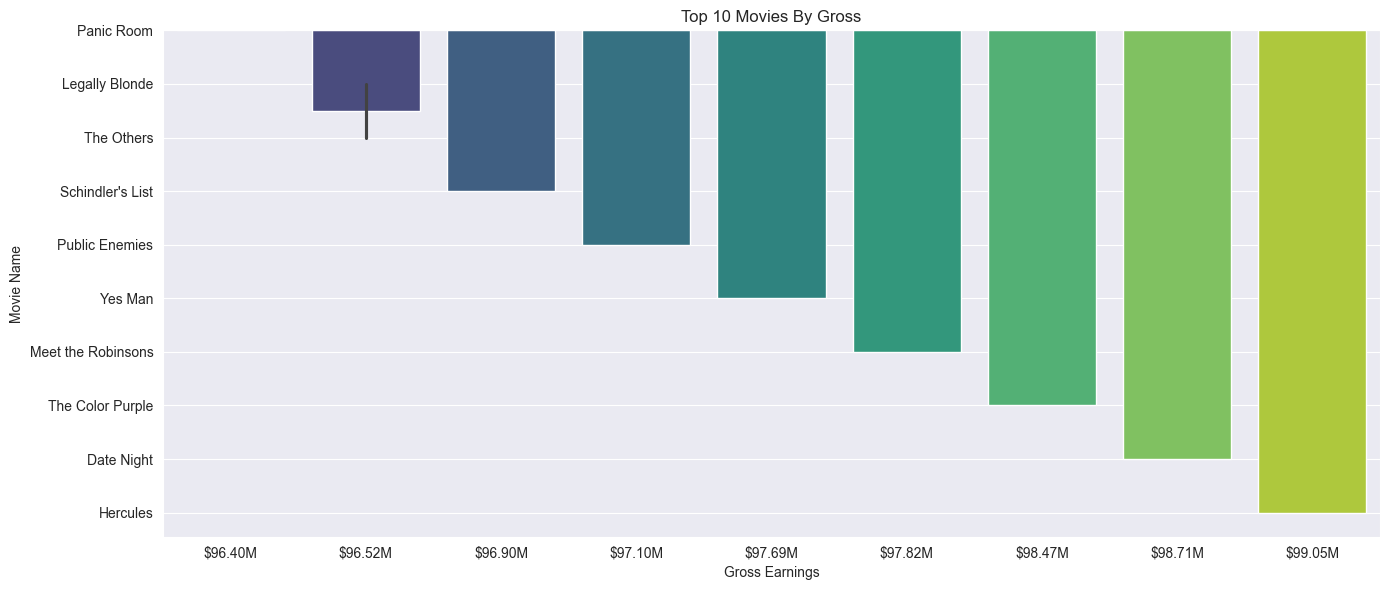

In [24]:
### Barplot Orientation is a problem ###
# Plots a bar chart showing the top 10 movies by gross earnings. The movies are sorted in ascending order of gross earnings and 
# displayed with their corresponding gross earnings. 
plt.figure(figsize=(14, 6))

data = df.sort_values(by='Gross', ascending=False).head(10).sort_values(by='Gross', ascending=True)

sns.barplot(data=data, y='Movie Name', x='Gross', palette="viridis")

plt.title("Top 10 Movies By Gross")
plt.xlabel("Gross Earnings")
plt.ylabel("Movie Name")
plt.tight_layout()
plt.show()


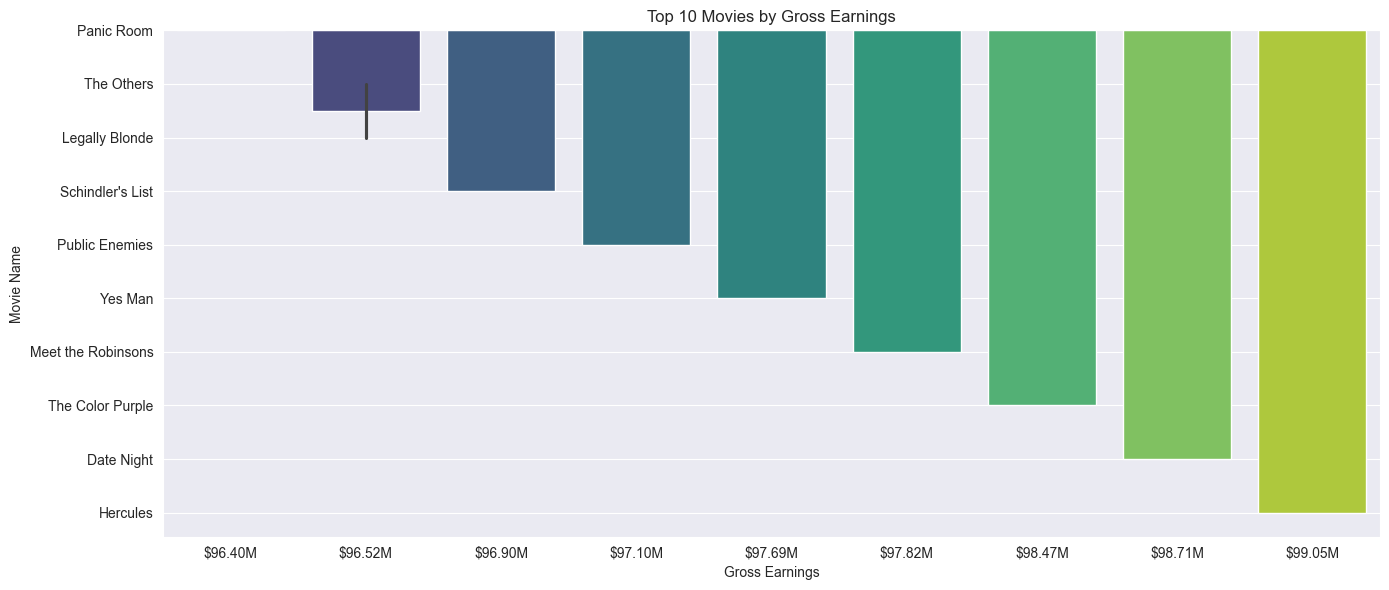

In [25]:
### Barplot Orientation is a problem ###
# Drop rows with NaN values in the 'Gross' column and get the top 10 movies based on gross earnings
top_10_gross_movies = df.dropna(subset=['Gross']).sort_values(by='Gross', ascending=True).tail(10)

# Set up the figure and axes
plt.figure(figsize=(14, 6))

# Create the barplot
sns.barplot(data=top_10_gross_movies, x='Gross', y='Movie Name', palette='viridis')

# Set labels and title
plt.xlabel('Gross Earnings')
plt.ylabel('Movie Name')
plt.title('Top 10 Movies by Gross Earnings')
plt.tight_layout()
plt.show()


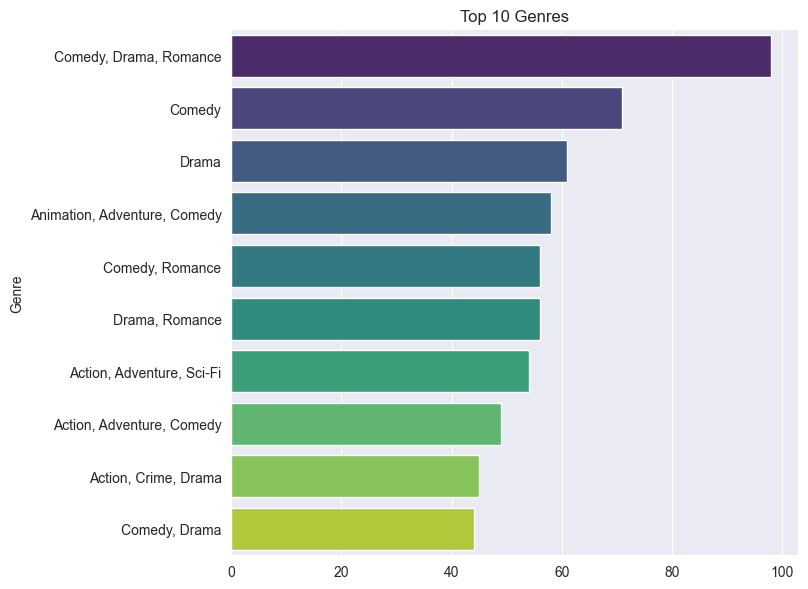

In [27]:
# Plots a bar chart displaying the top 10 genres based on their frequency in the dataset. The subplot is positioned on the right side of the figure
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
top10_genres = df['Genre'].value_counts().head(10)
sns.barplot(x=top10_genres.values, y=top10_genres.index, palette='viridis')
plt.title('Top 10 Genres')

plt.tight_layout()
plt.show()

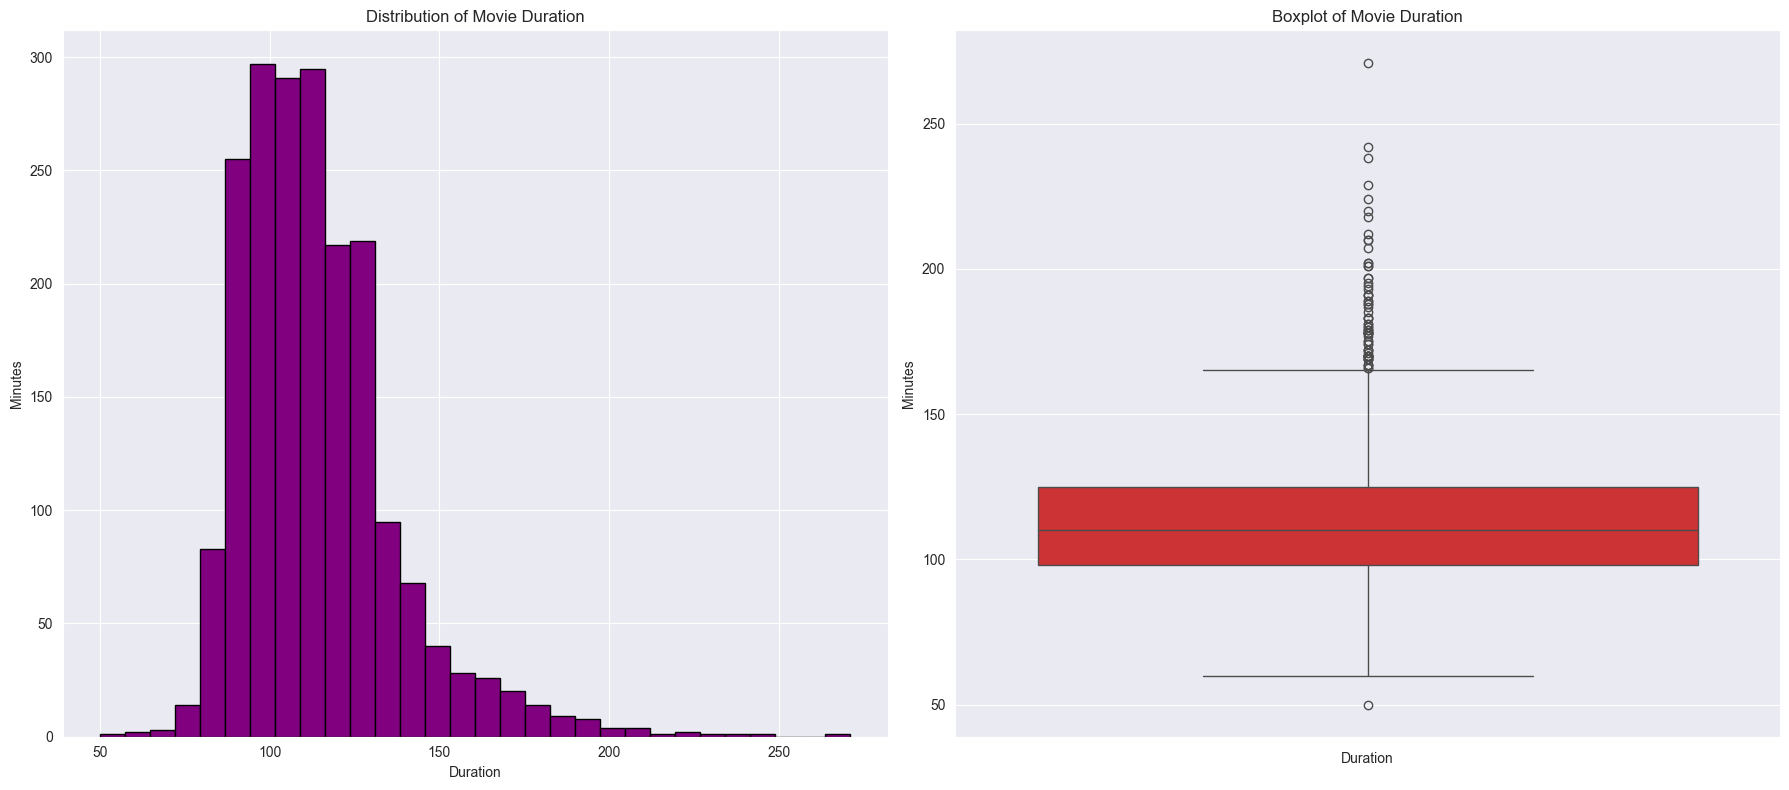

In [28]:
# Creates a figure with two subplots: a histogram of movie durations on the left and a boxplot of movie durations on the right.
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Plot histogram of movie durations
axs[0].hist(df['Duration'], bins=30, color='purple', edgecolor='black')
axs[0].set_xlabel('Duration')
axs[0].set_ylabel('Minutes')
axs[0].set_title('Distribution of Movie Duration')

# Plot boxplot of movie durations
sns.boxplot(data=df['Duration'], ax=axs[1], palette='Set1')
axs[1].set_xlabel('Duration')
axs[1].set_ylabel('Minutes')
axs[1].set_title('Boxplot of Movie Duration')

plt.tight_layout()
plt.show()


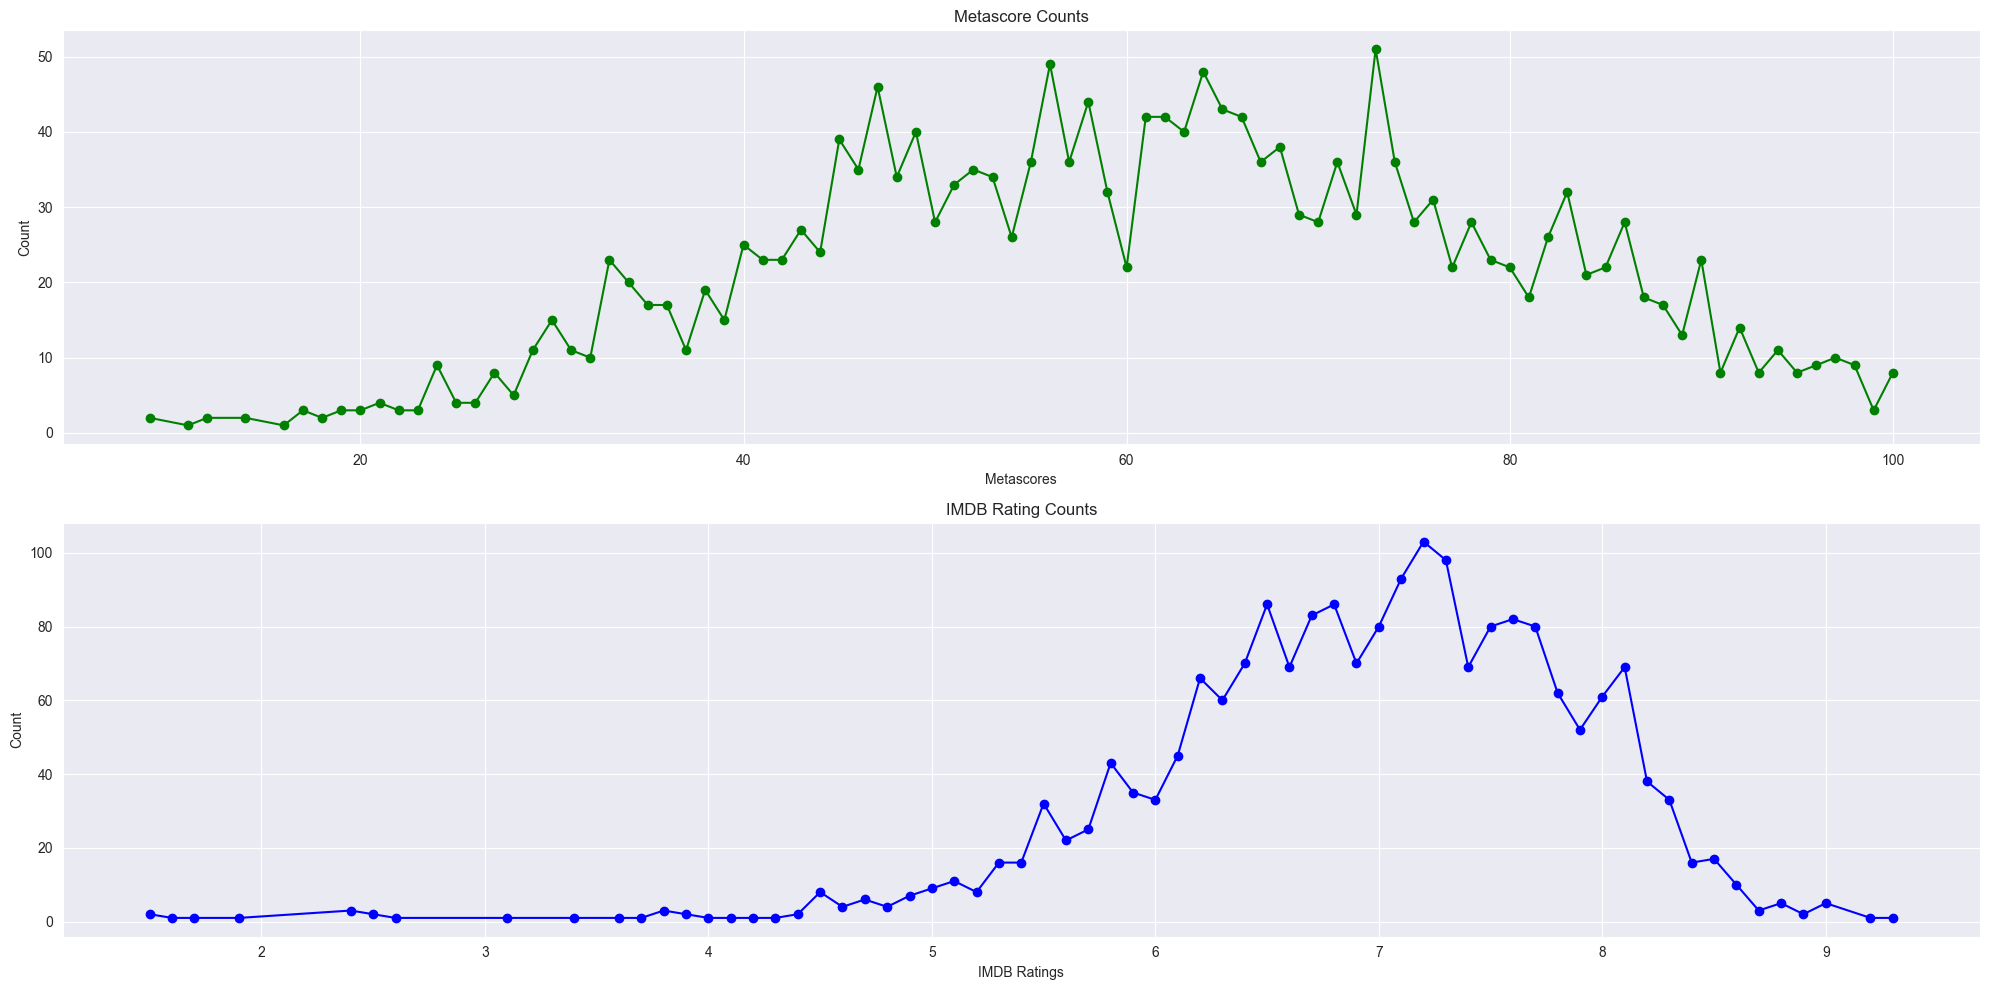

In [29]:

# Creates a figure with two subplots arranged vertically: the first subplot displays the counts of Metascores, 
# and the second subplot displays the counts of IMDb ratings
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

# Plot for Metascore data
df['Metascore'].value_counts().sort_index().plot(kind='line', marker='o', color='green', ax=axs[0])
axs[0].set_title('Metascore Counts')
axs[0].set_xlabel('Metascores')
axs[0].set_ylabel('Count')

# Plot for IMDb Rating data
df['IMDB Rating'].value_counts().sort_index().plot(kind='line', marker='o', color='blue', ax=axs[1])
axs[1].set_title('IMDB Rating Counts')
axs[1].set_xlabel('IMDB Ratings')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
5+7

12

In [ ]:
print("Helllo")


Helllo


In [ ]:
import numpy as np
my_list = [4, 7, 8, 2, 6]
t = np.array(my_list)
np.mean(t)
np.median(t)

6.0

In [ ]:
import pandas as pd
df = pd.read_csv('Salaries.csv')
df

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


In [ ]:
df.head(20)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [ ]:
df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


# ლექცია 2:
Pandas ბიბლიოთეკის გაცნობა; მონაცემთა ტიპები;  სვეტებთან და სტრიქონებთან მუშაობა;
ინდექსირება; ფილტრები, წაშლა, გადალაგება, დალაგება. არითმეტიკული და სტატისტიკური ოპერაციები.


# 1. სვეტებთან და სტრიქონებთან მუშაობა


In [ ]:
person = {
    "first": "Corey",
    "last": "Schafer",
    "email": "CoreyMSchafer@gmail.com"
}

In [ ]:
person

{'first': 'Corey', 'last': 'Schafer', 'email': 'CoreyMSchafer@gmail.com'}

In [ ]:
people = {
    "first": ["Corey"],
    "last": ["Schafer"],
    "email": ["CoreyMSchafer@gmail.com"]
}

In [ ]:
people = {
    "first": ["Corey", 'Jane', 'John'],
    "last": ["Schafer", 'Doe', 'Doe'],
    "email": ["CoreyMSchafer@gmail.com", 'JaneDoe@email.com', 'JohnDoe@email.com']
}

In [ ]:
people

{'first': ['Corey', 'Jane', 'John'],
 'last': ['Schafer', 'Doe', 'Doe'],
 'email': ['CoreyMSchafer@gmail.com',
  'JaneDoe@email.com',
  'JohnDoe@email.com']}

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(people)

In [ ]:
df

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@email.com
2,John,Doe,JohnDoe@email.com


In [ ]:
df['first']

0    Corey
1     Jane
2     John
Name: first, dtype: object

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df[['first', 'last']]

,first,last
0,Corey,Schafer
1,Jane,Doe
2,John,Doe


In [ ]:
df['email']

0    CoreyMSchafer@gmail.com
1          JaneDoe@email.com
2          JohnDoe@email.com
Name: email, dtype: object

In [ ]:
df.email

0    CoreyMSchafer@gmail.com
1          JaneDoe@email.com
2          JohnDoe@email.com
Name: email, dtype: object

In [ ]:
df.email

0    CoreyMSchafer@gmail.com
1          JaneDoe@email.com
2          JohnDoe@email.com
Name: email, dtype: object

In [ ]:
df.columns

Index(['first', 'last', 'email'], dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
df

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@email.com
2,John,Doe,JohnDoe@email.com


In [ ]:
df.iloc[[1,2], 2]

1    JaneDoe@email.com
2    JohnDoe@email.com
Name: email, dtype: object

In [ ]:
df.iloc[0:2, 0:2]

,first,last
0,Corey,Schafer
1,Jane,Doe


In [ ]:
df.loc[0]

first                      Corey
last                     Schafer
email    CoreyMSchafer@gmail.com
Name: 0, dtype: object

In [ ]:
df.loc[0, 'email']

'CoreyMSchafer@gmail.com'

In [ ]:
df

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Jane,Doe,JaneDoe@email.com
2,John,Doe,JohnDoe@email.com


In [ ]:
df.set_index('email')

,first,last
email,,
CoreyMSchafer@gmail.com,Corey,Schafer
JaneDoe@email.com,Jane,Doe
JohnDoe@email.com,John,Doe


In [ ]:
df.set_index('email', inplace=True)

In [ ]:
df.index

Index(['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com'], dtype='object', name='email')

In [ ]:
df.iloc[0]

first      Corey
last     Schafer
Name: CoreyMSchafer@gmail.com, dtype: object

In [ ]:
df.loc['CoreyMSchafer@gmail.com']

first      Corey
last     Schafer
Name: CoreyMSchafer@gmail.com, dtype: object

In [ ]:
df

,email,first,last
email,,,
CoreyMSchafer@gmail.com,CoreyMSchafer@gmail.com,Corey,Schafer
JaneDoe@email.com,JaneDoe@email.com,Jane,Doe
JohnDoe@email.com,JohnDoe@email.com,John,Doe


In [ ]:
df



,first,last
email,,
CoreyMSchafer@gmail.com,Corey,Schafer
JaneDoe@email.com,Jane,Doe
JohnDoe@email.com,John,Doe


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.set_index('email', drop=False, inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,email,first,last
0,CoreyMSchafer@gmail.com,Corey,Schafer
1,JaneDoe@email.com,Jane,Doe
2,JohnDoe@email.com,John,Doe


In [ ]:
filt = df['last'] == 'Doe'
type(filt)

pandas.core.series.Series

In [ ]:
df.loc[filt]

,email,first,last
1,JaneDoe@email.com,Jane,Doe
2,JohnDoe@email.com,John,Doe


# 1. სვეტებთან და სტრიქონებთან მუშაობა - csv



In [ ]:
import pandas as pd # 1. სვეტებთან და სტრიქონებთან მუშაობა


In [ ]:
df = pd.read_csv('data/survey_results_public.csv')

In [ ]:
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,88377,NaN,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,...,NaN,Tech articles written by other developers;Tech...,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
88879,88601,NaN,No,Never,The quality of OSS and closed source software ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,88802,NaN,No,Never,NaN,Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(88883, 85)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [ ]:
df.head(10)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
7,8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
8,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or mor

In [ ]:
df.tail(10)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
88873,88062,NaN,No,Never,"OSS is, on average, of LOWER quality than prop...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88874,88076,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88875,88182,NaN,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed part-time,Pakistan,NaN,"Secondary school (e.g. American high school, G...",NaN,...,Not applicable - I did not use Stack Overflow ...,Courses on technologies you're interested in,NaN,Man,No,Straight / Heterosexual,NaN,Yes,Too short,Neither easy nor difficult
88876,88212,NaN,No,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Spain,No,"Secondary school (e.g. American high school, G...",NaN,...,NaN,Tech articles written by other developers;Indu...,40.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
88877,88282,NaN,Yes,Once a month or more often,The quality of OSS and closed source software ...,"Not employed, but looking for work",United States,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,NaN,Man,No,Straight / Heterosexual,NaN,No,Too short,Neither easy nor difficult
88878,88377,NaN,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,...,NaN,Tech articles written by other developers;Tech...,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
88879,88601,NaN,No,Never,The quality of OSS and closed source software ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,88802,NaN,No,Never,NaN,Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88882,88863,NaN,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, and not looking for work",Spain,"Yes, full-time","Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers;Indu...,18.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;White or of European...,No,Appropriate in length,Easy


In [ ]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [ ]:
df.Hobbyist

0        Yes
1         No
2        Yes
3         No
4        Yes
        ... 
88878    Yes
88879     No
88880     No
88881     No
88882    Yes
Name: Hobbyist, Length: 88883, dtype: object

In [ ]:
df['Hobbyist'].value_counts()

Yes    71257
No     17626
Name: Hobbyist, dtype: int64

In [ ]:
df['ConvertedComp'].value_counts()

2000000.0    709
1000000.0    558
120000.0     502
100000.0     480
150000.0     434
            ... 
411096.0       1
261228.0       1
82322.0        1
66424.0        1
588012.0       1
Name: ConvertedComp, Length: 9162, dtype: int64

In [ ]:
df['ConvertedComp'].describe()

count    5.582300e+04
mean     1.271107e+05
std      2.841523e+05
min      0.000000e+00
25%      2.577750e+04
50%      5.728700e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [ ]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [ ]:
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,88377,NaN,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,...,NaN,Tech articles written by other developers;Tech...,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
88879,88601,NaN,No,Never,The quality of OSS and closed source software ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,88802,NaN,No,Never,NaN,Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,88377,NaN,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,...,NaN,Tech articles written by other developers;Tech...,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
88879,88601,NaN,No,Never,The quality of OSS and closed source software ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,88802,NaN,No,Never,NaN,Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. ინდექსირება (csv ფაილი)

In [ ]:
# df = pd.read_csv('data/survey_results_public.csv')
# schema_df = pd.read_csv('data/survey_results_schema.csv')
import pandas as pd
df = pd.read_csv('data/survey_results_public.csv', index_col='Respondent')
schema_df = pd.read_csv('data/survey_results_schema.csv', index_col='Column')

In [ ]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [ ]:
df

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Int

In [ ]:
df.head(5)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Int

In [ ]:
schema_df

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
OpenSourcer,How often do you contribute to open source?
OpenSource,How do you feel about the quality of open sour...
Employment,Which of the following best describes your cur...
Country,In which country do you currently reside?
Student,"Are you currently enrolled in a formal, degree..."
EdLevel,Which of the following best describes the high...


In [ ]:
schema_df.sort_index(ascending=False)

,QuestionText
Column,
YearsCodePro,How many years have you coded professionally (...
YearsCode,"Including any education, how many years have y..."
WorkWeekHrs,"On average, how many hours per week do you work?"
WorkRemote,How often do you work remotely?
WorkPlan,How structured or planned is your work?
WorkLoc,Where would you prefer to work?
WorkChallenge,"Of these options, what are your greatest chall..."
WelcomeChange,"Compared to last year, how welcome do you feel..."
WebFrameWorkedWith,Which of the following web frameworks have you...


In [ ]:
schema_df

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
OpenSourcer,How often do you contribute to open source?
OpenSource,How do you feel about the quality of open sour...
Employment,Which of the following best describes your cur...
Country,In which country do you currently reside?
Student,"Are you currently enrolled in a formal, degree..."
EdLevel,Which of the following best describes the high...


# 3. ფილტრაცია (csv ფაილი)

In [ ]:
df.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Int

In [ ]:
df.ConvertedComp

Respondent
1            NaN
2            NaN
3         8820.0
4        61000.0
5            NaN
          ...   
88377        NaN
88601        NaN
88802        NaN
88816        NaN
88863        NaN
Name: ConvertedComp, Length: 88883, dtype: float64

In [ ]:
df['ConvertedComp']

Respondent
1            NaN
2            NaN
3         8820.0
4        61000.0
5            NaN
          ...   
88377        NaN
88601        NaN
88802        NaN
88816        NaN
88863        NaN
Name: ConvertedComp, Length: 88883, dtype: float64

In [ ]:
filt = df['ConvertedComp'] *0.2 > 70000
filt

Respondent
1        False
2        False
3        False
4        False
5        False
         ...  
88377    False
88601    False
88802    False
88816    False
88863    False
Name: ConvertedComp, Length: 88883, dtype: bool

In [ ]:
df.loc[filt, ['Country', 'Student']]

,Country,Student
Respondent,,
6,Canada,No
9,New Zealand,No
13,United States,No
16,United Kingdom,No
22,United States,No
...,...,...
88876,United States,No
88877,United States,No
88878,United States,No


In [ ]:
df.loc[filt, ['Country', 'ConvertedComp']]

,Country,ConvertedComp
Respondent,,
6,Canada,366420.0
9,New Zealand,95179.0
13,United States,90000.0
16,United Kingdom,455352.0
22,United States,103000.0
...,...,...
88876,United States,180000.0
88877,United States,2000000.0
88878,United States,130000.0


In [ ]:
df.loc[filt, 'Country'].value_counts()

United States                           12192
United Kingdom                           1962
Germany                                  1386
Canada                                   1062
Australia                                 765
                                        ...  
Liechtenstein                               1
Venezuela, Bolivarian Republic of...        1
Somalia                                     1
Bahrain                                     1
Pakistan                                    1
Name: Country, Length: 116, dtype: int64

In [ ]:
df.Country.value_counts().India

9061

In [ ]:
df.Country.value_counts()['Georgia']

80

In [ ]:
filt2 = df['Country'] == 'Georgia'

In [ ]:
df.loc[filt2]

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
774,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Georgia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,20 to 99 employees,"Developer, back-end",8,18,5,Slightly satisfied,Slightly satisfied,Very confident,No,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Complete a take-home project;Interview with pe...,No,Financial performance or funding status of the...,"Something else changed (education, award, medi...",GEL,Georgian lari,NaN,Monthly,NaN,40.0,There is a schedule and/or spec (made by me or...,Distracting work environment;Meetings;Toxic wo...,Less than once per month / Never,Office,Average,"Yes, because I see value in code review",4.0,"Yes, it's part of our process",Developers and management have nearly equal in...,I have some influence,Ruby;Scala;SQL;Other(s):,Java;Ruby;Scala;SQL;Other(s):,Couchbase;Elasticsearch;Microsoft SQL Server;P...,Elasticsearch;Microsoft SQL Server;PostgreSQL;...,Android;Linux;MacOS;Slack,Docker;Linux,Ruby on Rails,Ruby on Rails,NaN,NaN,RubyMine;Sublime Text;Vim,Linux-based,I do not use containers,Not at all,Useful across many domains and could change ma...,Yes,Yes,No,Facebook,In real life (in person),Username,2012,Multiple times per day,Find answers to specific questions,3-5 times per week,Stack Overflow was slightly faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are",Neutral,A lot more welcome now than last year,Tech articles written by other developers;Cour...,26.0,Woman,No,NaN,White or of European descent,No,Too long,Neither easy nor difficult
2019,I am a developer by profession,No,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Georgia,No,"Other doctoral degree (Ph.D, Ed.D., etc.)",Web development or web design,Taken an online course in programming or softw...,10 to 19 employees,Academic researcher;Data or business analyst;D...,5,18,6,Very satisfied,NaN,NaN,NaN,NaN,I am not interested in new job opportunities,3-4 years ago,"Write any code;Write code by hand (e.g., on a ...",Yes,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,0.0,Yearly,0.0,24.0,There is a schedule and/or spec (made by me or...,Distracting work environment;Inadequate access...,All or almost all the time (I'm full-time remote),"Other place, such as a coworking space or cafe",Average,"Yes, because I was told to do so",1.0,"Yes, it's not part of our process but the deve...",Not sure,I have a great deal of influence,NaN,Assembly;Bash/Shell/PowerShell;C;C++;C#;Clojur...,Cassandra;Couchbase;DynamoDB;Elasticsearch;Fir...,Oracle;PostgreSQL;Redis;SQLite;Other(s):,NaN,Android;Ar

In [ ]:
df['Hobbyist'].value_counts(normalize=True)

Yes    0.801694
No     0.198306
Name: Hobbyist, dtype: float64

In [ ]:
df.sort_values(by=["Country", 'Hobbyist'])

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
722,I am a developer by profession,No,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,Less than 1 year,Younger than 5 years,Less than 1 year,Very satisfied,Very satisfied,NaN,NaN,NaN,I am not interested in new job opportunities,NA - I am an independent contractor or self em...,NaN,No,NaN,I heard about a job opportunity (from a recrui...,AFN,Afghan afghani,1.0,Yearly,0.0,1.0,NaN,NaN,Less than once per month / Never,"Other place, such as a coworking space or cafe",Far above average,"Yes, because I see value in code review",1.0,"No, and I'm glad we don't",NaN,I have little or no influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,SIGH,What?,NaN,Neither,NaN,2008,Multiple times per day,NaN,More than 10 times per week,The other resource was much faster,60+ minutes,Not sure / can't remember,NaN,Yes,Yes,Not sure,Not applicable - I did not use Stack Overflow ...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Too long,Difficult
7353,I am a developer by profession,No,Never,NaN,Retired,Afghanistan,No,I never completed any formal education,NaN,Received on-the-job training in software devel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Clojure;Erlang;Java;R;Ruby;Rust;Web...,Go;WebAssembly,Cassandra;DynamoDB;Firebase;MariaDB;Microsoft ...,NaN,Android;Google Cloud Platform;Microsoft Azure;...,NaN,ASP.NET;Django;Express;Ruby on Rails,Express,Apache Spark;Cordova;TensorFlow;Unreal Engine,NaN,Android Studio;Komodo;PyCharm;RubyMine;Zend,Windows,Development,NaN,NaN,NaN,NaN,NaN,YouTube,Online,Login,NaN,Multiple times per day,Find answers to specific questions;Contribute ...,More than 10 times per week,The other resource was much faster,60+ minutes,NaN,NaN,NaN,NaN,NaN,Just as welcome now as I felt last year,Industry news about technologies you're intere...,NaN,Man,Yes,NaN,NaN,NaN,NaN,NaN
22450,I am a developer by profession,No,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Afghanistan,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, back-end;Developer, desktop or ente...",3,19,2,Very satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",3-4 years ago,"Write code by hand (e.g., on a whiteboard);Com...",No,Office environment or company culture;Opportun...,I heard about a job opportunity (from a recrui...,AFN,Afghan afghani,50000.0,Monthly,7980.0,45.0,There's no schedule or spec; I work on what se...,Distracting work environment;Lack of support f...,Less than once per month / Never,Home,A little above average,"Yes, because I see value in code review",3.0,"Yes, it's not part of our pro

In [ ]:
df.columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq',
       'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 

In [ ]:
filt = (df['ConvertedComp'] > 70000) & (df['Country'] == 'Georgia')

In [ ]:
df.loc[filt]

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54612,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",Georgia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...","Just me - I am a freelancer, sole proprietor, ...","Database administrator;Developer, back-end;Dev...",15,11,10,Very satisfied,Very satisfied,NaN,NaN,NaN,"I’m not actively looking, but I am open to new...",NA - I am an independent contractor or self em...,Interview with people in peer roles;Interview ...,No,"Languages, frameworks, and other technologies ...","Something else changed (education, award, medi...",EUR,European Euro,280000.0,Yearly,320810.0,40.0,There is a schedule and/or spec (made by me or...,Distracting work environment;Inadequate access...,"More than half, but not all, the time",Home,Far above average,"Yes, because I see value in code review",5.0,NaN,NaN,NaN,Bash/Shell/PowerShell;C;C++;Erlang;Go;HTML/CSS...,Bash/Shell/PowerShell;Erlang;Go;HTML/CSS;Java;...,Elasticsearch;MariaDB;MongoDB;MySQL;Oracle;Pos...,Elasticsearch;PostgreSQL;Redis;SQLite,Android;AWS;Docker;Kubernetes;Linux;MacOS;Rasp...,AWS;Docker;Kubernetes;Linux;Raspberry Pi;Slack,Django;Express;Flask;React.js;Spring;Vue.js,Flask,Ansible;Node.js;TensorFlow;Torch/PyTorch;Unrea...,Ansible;Pandas;TensorFlow;Torch/PyTorch;Unreal...,Vim,Linux-based,Development;Testing;Production;Outside of work...,NaN,Useful for immutable record keeping outside of...,Yes,SIGH,What?,Reddit,In real life (in person),Username,2008,A few times per week,Find answers to specific questions,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,Yes,"No, and I don't know what those are","Yes, somewhat",Somewhat less welcome now than last year,Tech meetups or events in your area,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
82968,"I am not primarily a developer, but I write co...",Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Georgia,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, front-end;Developer, mobile;Enginee...",15,19,8,Neither satisfied nor dissatisfied,Slightly satisfied,NaN,NaN,NaN,"I’m not actively looking, but I am open to new...",Less than a year ago,Interview with people in peer roles;Interview ...,No,Office environment or company culture;Diversit...,"Something else changed (education, award, medi...",GEL,Georgian lari,57600.0,Weekly,1000000.0,50.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,Far abov

In [ ]:
countries = ['Germany', 'Georgia', 'Spain']

In [ ]:
filt = df['Country'].isin(countries)

In [ ]:
filt

Respondent
1        False
2        False
3        False
4        False
5        False
         ...  
88377    False
88601    False
88802    False
88816    False
88863     True
Name: Country, Length: 88883, dtype: bool

In [ ]:
df.loc[filt]

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Germany,No,"Other doctoral degree (Ph.D, Ed.D., etc.)","Computer science, computer engineering, or sof...",Completed an industry certification program (e...,100 to 499 employees,"Developer, desktop or enterprise applications",13,16,2,Very satisfied,Very satisfied,Very confident,No,No,I am not interested in new job opportunities,1-2 years ago,Interview with people in senior / management r...,No,"Languages, frameworks, and other technologies ...","Something else changed (education, award, medi...",EUR,European Euro,4150.0,Monthly,57060.0,40.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Not eno...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",4.0,"Yes, it's part of our process",Developers typically have the most influence o...,I have some influence,C++,C++,NaN,NaN,Windows,Windows,NaN,NaN,NaN,Unreal Engine,Visual Studio,Windows,I do not use containers,Not at all,NaN,Yes,Yes,Yes,Reddit,Online,Username,2010,Multiple times per day,Find answers to specific questions,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,31.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too short,Easy
36,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Germany,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,"1,000 to 4,999 employees","Developer, mobile;Student",10,10,Less than 1 year,Very satisfied,Very satisfied,Very confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Interview with people in senior / management r...,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,EUR,European Euro,1500.0,Monthly,20628.0,38.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Not eno...,Less than once per month / Never,Office,Average,"Yes, because I see value in code review",3.0,"Yes, it's not part of our process but the deve...",Not sure,I have little or no influence,Java;Kotlin;Python,Kotlin;Python,NaN,NaN,Android,Android;AWS;Docker,NaN,NaN,NaN,Ansible,Android Studio;IntelliJ;Notepad++;PyCharm;RStu...,MacOS,"Outside of work, for personal projects",Implementing our own cryptocurrency,Useful for immutable record keeping outside of...,Yes,SIGH,Yes,Reddit,Online,Username,2013,Daily or almost daily,Find answers to specific questions,3-5 times per week,Stack Overflow was slightly faster,60+ min

In [ ]:
df.loc[filt, 'Country'].value_counts(normalize=True)*100

Germany    77.695364
Spain      21.245033
Georgia     1.059603
Name: Country, dtype: float64

In [ ]:
df.columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq',
       'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 

In [ ]:
df.LanguageWorkedWith

Respondent
1                          HTML/CSS;Java;JavaScript;Python
2                                      C++;HTML/CSS;Python
3                                                 HTML/CSS
4                                      C;C++;C#;Python;SQL
5              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
                               ...                        
88377                        HTML/CSS;JavaScript;Other(s):
88601                                                  NaN
88802                                                  NaN
88816                                                  NaN
88863    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
Name: LanguageWorkedWith, Length: 88883, dtype: object

In [ ]:
filt = df.LanguageWorkedWith.str.contains('Python', na=False )

In [ ]:
filt

Respondent
1         True
2         True
3        False
4         True
5         True
         ...  
88377    False
88601    False
88802    False
88816    False
88863    False
Name: LanguageWorkedWith, Length: 88883, dtype: bool

In [ ]:
df.loc[filt, 'LanguageWorkedWith'][8]

'Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;JavaScript;Python;SQL'

# 4. Add/Remove Rows and Columns

In [ ]:
people = {
    'first': ['Tony', 'Steve'],
    'last': ['Stark', 'Rogers'],
    'email': ['IronMan@avenge.com', 'Cap@avenge.com']
}
df2 = pd.DataFrame(people)

In [ ]:
df2

,first,last,email
0,Tony,Stark,IronMan@avenge.com
1,Steve,Rogers,Cap@avenge.com


In [ ]:
df2['fullname'] = df2['first'] + '  '+ df2['last']

In [ ]:
df2

,first,last,email,fullname
0,Tony,Stark,IronMan@avenge.com,Tony Stark
1,Steve,Rogers,Cap@avenge.com,Steve Rogers


In [ ]:
df2.drop(columns=['first', 'last'], inplace=True)

In [ ]:
df2.sort_columns()

,email,fullname
0,IronMan@avenge.com,Tony Stark
1,Cap@avenge.com,Steve Rogers


In [ ]:
df2['fullname'].str.split(expand=True)

,0,1
0,Tony,Stark
1,Steve,Rogers


In [ ]:
df2[['firstname', 'lastname']] = df2['fullname'].str.split(expand=True)

In [ ]:
df2

,email,fullname,firstname,lastname
0,IronMan@avenge.com,Tony Stark,Tony,Stark
1,Cap@avenge.com,Steve Rogers,Steve,Rogers


In [ ]:
df2.drop(index=1, inplace=True)

In [ ]:
df2

,email,fullname,firstname,lastname
0,IronMan@avenge.com,Tony Stark,Tony,Stark
1,Cap@avenge.com,Steve Rogers,Steve,Rogers


# 5. Sorting Data

In [ ]:
df = pd.read_csv('data/survey_results_public.csv', index_col='Respondent')
schema_df = pd.read_csv('data/survey_results_schema.csv', index_col='Column')

In [ ]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [ ]:
df.sort_values(by=['Country', 'ConvertedComp'], ascending=[True, False], inplace=True)

In [ ]:
df['ConvertedComp'].nlargest(20)

Respondent
25983    2000000.0
87896    2000000.0
22013    2000000.0
28243    2000000.0
72732    2000000.0
78151    2000000.0
80200    2000000.0
52132    2000000.0
75561    2000000.0
32250    2000000.0
84390    2000000.0
58       2000000.0
102      2000000.0
166      2000000.0
436      2000000.0
452      2000000.0
491      2000000.0
539      2000000.0
770      2000000.0
789      2000000.0
Name: ConvertedComp, dtype: float64

In [ ]:
df.nlargest(30, 'Age')['Country']

Respondent
34973                    Argentina
11332                   Azerbaijan
16214                   Bangladesh
44142                      Belgium
25294                       Brazil
58176                       Canada
27841                       Canada
78562                       Canada
29884                      Finland
70284                      Finland
62246                      Germany
9833                       Hungary
84084                        Japan
36312                       Norway
11548                     Thailand
50847                United States
20199                United States
83601                United States
88407                United States
42787                     Viet Nam
50130                     Viet Nam
56938                United States
75856                        India
78482                        India
21403                         Iraq
5485                 United States
64877                        India
88233                  South Korea
64209    

In [ ]:
df['ConvertedComp'].nsmallest(20)

Respondent
722      0.0
28638    0.0
13825    0.0
40913    0.0
30630    0.0
69049    0.0
19340    0.0
16214    0.0
29355    0.0
1685     0.0
11875    0.0
25298    0.0
50707    0.0
1105     0.0
14883    0.0
16758    0.0
21942    0.0
37205    0.0
39051    0.0
42604    0.0
Name: ConvertedComp, dtype: float64

# 6. სტატისტიკური ოპერაციები

In [ ]:
df['ConvertedComp'].median()


57287.0

In [ ]:
df.describe()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [ ]:
df.ConvertedComp.describe().apply(lambda x: format(x, 'f'))

count      55823.000000
mean      127110.738423
std       284152.303842
min            0.000000
25%        25777.500000
50%        57287.000000
75%       100000.000000
max      2000000.000000
Name: ConvertedComp, dtype: object

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,55945.00,55823.00,64503.00,49790.00,79210.00
mean,551901414118.76,127110.74,42.13,5.08,30.34
std,73319262253438.03,284152.30,37.29,5.51,9.18
min,0.00,0.00,1.00,0.00,1.00
25%,20000.00,25777.50,40.00,2.00,24.00
50%,62000.00,57287.00,40.00,4.00,29.00
75%,120000.00,100000.00,44.75,6.00,35.00
max,10000000000000000.00,2000000.00,4850.00,99.00,99.00


In [ ]:
df.ConvertedComp.count()

55823

In [ ]:
df.Hobbyist.count()

88883

In [ ]:
df.Hobbyist.value_counts()

Yes    71257
No     17626
Name: Hobbyist, dtype: int64

In [ ]:
countrygr = df.groupby(['Country'])

In [ ]:
df.groupby(['Country']).get_group('Canada')

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25983,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Received on-the-job training in software devel...,"10,000 or more employees","Developer, full-stack",8,16,2,Very satisfied,Very satisfied,Somewhat confident,No,No,"I’m not actively looking, but I am open to new...",3-4 years ago,Solve a brain-teaser style puzzle;Interview wi...,No,Remote work options;Opportunities for professi...,"My job status changed (promotion, new job, etc.)",USD,United States dollar,65500.0,Weekly,2000000.0,45.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Meeting...,A few days each month,Office,Average,"Yes, because I see value in code review",2.0,"Yes, it's part of our process",Developers and management have nearly equal in...,I have little or no influence,Bash/Shell/PowerShell;C++;C#;HTML/CSS;JavaScri...,Bash/Shell/PowerShell;C#;F#;Python;SQL;TypeScript,Microsoft SQL Server;MySQL,Microsoft SQL Server;MySQL,AWS;Docker;Heroku;Linux;MacOS;Raspberry Pi;Win...,AWS;Docker;Linux;MacOS;Windows,Angular/Angular.js,Angular/Angular.js;Flask;React.js,.NET;.NET Core;Node.js,.NET Core;Node.js,Notepad++;Sublime Text;Vim;Visual Studio;Visua...,Windows,Development;Production,NaN,"Useful for decentralized currency (i.e., Bitcoin)",No,Yes,Yes,Reddit,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Learn how t...,1-2 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,NaN,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
30670,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,Participated in a full-time developer training...,20 to 99 employees,Educator,5,21,4,Very satisfied,Slightly satisfied,Somewhat confident,No,Yes,"I’m not actively looking, but I am open to new...",3-4 years ago,Write any code;Interview with people in peer r...,No,Industry that I'd be working in;Office environ...,I heard about a job opportunity (from a recrui...,USD,United States dollar,130000.0,Monthly,1560000.0,38.0,There is a schedule and/or spec (made by me or...,Toxic work environment,All or almost all the time (I'm full-time remote),Office,A little above average,"Yes, because I see value in code review",NaN,"Yes, it's part of our process","The CTO, CIO, or other management purchase new...",I have little or no influence,Bash/Shell/PowerShell;Go;JavaScript;Ruby;SQL,Bash/Shell/PowerShell;Elixir;Go;Ruby,Firebase;PostgreSQL,P

In [ ]:
countrygr

In [ ]:
countrygr['SocialMedia'].value_counts().Georgia

SocialMedia
Facebook                    35
YouTube                     23
Reddit                       6
Twitter                      5
I don't use social media     3
LinkedIn                     3
WhatsApp                     2
Instagram                    1
Name: SocialMedia, dtype: int64

In [ ]:
df['ConvertedComp'].mean()

127110.73842323056

In [ ]:
countrygr['ConvertedComp'].mean().Georgia

42008.204081632655

### Load in NumPy (remember to pip install numpy first)

In [ ]:
import numpy as np

### fsfsdg

### The Basics

In [ ]:
a = np.array([2, 5, 8], dtype='int32')
print(a)

[2 5 8]


In [ ]:
a.ndim

1

In [ ]:
a.size

3

In [ ]:
a.itemsize

4

In [ ]:
a.shape

(3,)

In [ ]:
b = np.array([[1,3,7], [2,5,4]])
print(b)

[[1 3 7]
 [2 5 4]]


In [ ]:
b.shape

(2, 3)

In [ ]:
b.ndim

2

In [ ]:
c = np.array([[[1,2,3], [4,5,6], [7,8,9]], [[0,1,1],[1,1,1], [2,1,1]]])
print(c)

[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[0 1 1]
  [1 1 1]
  [2 1 1]]]


### Accessing/Changing specific elements, rows, columns, etc

In [ ]:
a = np.array([[1,2,3,4,5,6,7],[8,9,10,11,12,13,14]])
print(a)

[[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]]


In [ ]:
a[1,3]

11

In [ ]:
a[1,3] = 7

In [ ]:
a

array([[ 1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10,  7, 12, 13, 14]])

In [ ]:
a[1,:]
a[1]

array([ 8,  9, 10,  7, 12, 13, 14])

In [ ]:
a[:,1]

array([2, 9])

In [ ]:
a

array([[ 1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10,  7, 12, 13, 14]])

In [ ]:
a[: , 1:3]

array([[ 2,  3],
       [ 9, 10]])

In [ ]:
a[:, 3] = [5, 1]
# a[:, 3] = 5

In [ ]:
a

array([[ 1,  2,  3,  5,  5,  6,  7],
       [ 8,  9, 10,  1, 12, 13, 14]])

In [ ]:
c

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[0, 1, 1],
        [1, 1, 1],
        [2, 1, 1]]])

In [ ]:
c[1, 0, 2] = 7

In [ ]:
c

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[0, 1, 7],
        [1, 1, 1],
        [2, 1, 1]]])

### Initializing Different Types of Arrays

In [ ]:
a = np.zeros((2,3))
print(a)

[[0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
a = np.ones((2,3,3), dtype='int32')
a

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]])

In [ ]:
np.full((2,3), 4)

array([[4, 4, 4],
       [4, 4, 4]])

In [ ]:
np.random.rand(2,3)

array([[0.45892635, 0.5433415 , 0.66538848],
       [0.55044478, 0.83713552, 0.5862007 ]])

In [ ]:
np.random.randint(-5, 5, size=(3,4))

array([[-3,  1,  1, -1],
       [-5,  4, -4,  2],
       [-3,  0, -2, -1]])

In [ ]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
np.repeat(3,4)

array([3, 3, 3, 3])

In [ ]:
np.repeat([1,2,3], 4, axis=0)

array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])

In [ ]:
np.repeat([[1,2,3]], 4, axis=1)

array([[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]])

In [ ]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [ ]:
np.arange(-5, 7, 2)

array([-5, -3, -1,  1,  3,  5])

In [ ]:
np.arange(-5, 7, 2).reshape(2,3)

array([[-5, -3, -1],
       [ 1,  3,  5]])

##### Be careful when copying arrays!!!

In [ ]:
k = np.array([1,2,3])
b = k
b = k.copy()
b[0] = 100

print(k)

[1 2 3]


### Mathematics

In [ ]:
a = np.array([1,2,3,4])
print(a)

[1 2 3 4]


##### Linear Algebra

In [ ]:
a = np.ones((2,3))
print(a)

b = np.full((3,2), 2)
print(b)

np.matmul(a,b)

[[1. 1. 1.]
 [1. 1. 1.]]
[[2 2]
 [2 2]
 [2 2]]


array([[6., 6.],
       [6., 6.]])

##### Statistics

In [ ]:
stats = np.array([[1,7,3],[4,5,2]])
stats

array([[1, 7, 3],
       [4, 5, 2]])

In [ ]:
stats.min()

1

In [ ]:
np.min(stats)

1

In [ ]:
stats.min(axis=0)

array([1, 5, 2])

In [ ]:
stats.min(axis=1)

array([1, 2])

In [ ]:
stats

array([[1, 7, 3],
       [4, 5, 2]])

In [ ]:
np.sum(stats, axis=1)

array([11, 11])

### Reorganizing Arrays

In [ ]:
# reshape() - Gives a new shape to an array without changing its data.
before = np.array([[1,2,3,4],[5,6,7,8]])
print(before)
before.reshape(4,2)

[[1 2 3 4]
 [5 6 7 8]]


array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
# Vertically stacking vectors
v1 = np.array([1,2,3,4])
v2 = np.array([5,6,7,8])
np.vstack((v1,v2, v1, v2))


array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [1, 2, 3, 4],
       [5, 6, 7, 8]])

In [ ]:
# Horizontal  stack
h1 = np.ones((2,4))
h2 = np.zeros((2,2))
np.hstack((h1, h2))



array([[1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.]])

### Exercises
##### Write a NumPy program to create a 5x5 array with random values and replace the minimum value with 0.

In [ ]:
nums = np.random.rand(5,5)
nums

array([[0.74516439, 0.73186862, 0.73682897, 0.51962109, 0.3600594 ],
       [0.03596519, 0.41945599, 0.94661549, 0.28815927, 0.27135846],
       [0.60927214, 0.44990728, 0.71394821, 0.67445542, 0.97001345],
       [0.96630388, 0.59953739, 0.62399512, 0.06198171, 0.73250439],
       [0.32338829, 0.64492261, 0.53968649, 0.47393051, 0.17349208]])

In [ ]:
min_value = nums.min()
min_value

0.03596518697819495

In [ ]:
nums[nums == min_value ] = 0

In [ ]:
nums

array([[0.74516439, 0.73186862, 0.73682897, 0.51962109, 0.3600594 ],
       [0.        , 0.41945599, 0.94661549, 0.28815927, 0.27135846],
       [0.60927214, 0.44990728, 0.71394821, 0.67445542, 0.97001345],
       [0.96630388, 0.59953739, 0.62399512, 0.06198171, 0.73250439],
       [0.32338829, 0.64492261, 0.53968649, 0.47393051, 0.17349208]])

In [ ]:
min_values = nums.min(axis=0)
min_values

array([0.        , 0.41945599, 0.53968649, 0.06198171, 0.17349208])

In [ ]:
nums[nums == min_values] = 1
nums

array([[0.74516439, 0.73186862, 0.73682897, 0.51962109, 0.3600594 ],
       [1.        , 1.        , 0.94661549, 0.28815927, 0.27135846],
       [0.60927214, 0.44990728, 0.71394821, 0.67445542, 0.97001345],
       [0.96630388, 0.59953739, 0.62399512, 1.        , 0.73250439],
       [0.32338829, 0.64492261, 1.        , 0.47393051, 1.        ]])


## Searching Arrays
#### You can search an array for a certain value, and return the indexes that get a match

In [ ]:
# where(condition, [x, y], /) Return elements chosen from x or y depending on condition.
# x, y : Values from which to choose. x, y and condition need to be broadcastable to some shape.
arr = np.array([1, 2, 3, 4, 5, 4, 4])



In [ ]:
ind = np.where(arr==4)
ind

(array([3, 5, 6], dtype=int64),)

In [ ]:
ind[0][0]

3

In [ ]:
nums = np.random.randint(0,5, size=(3,3))
nums

array([[3, 1, 4],
       [2, 1, 0],
       [0, 4, 3]])

In [ ]:
np.where(nums==1)

(array([0, 1], dtype=int64), array([1, 1], dtype=int64))


## Matplotlib

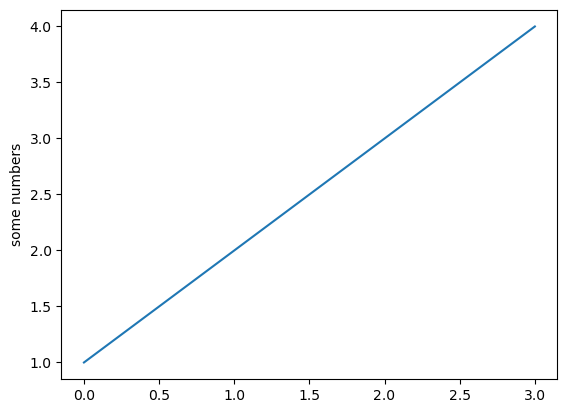

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

### სავარჯიშო
##### ააგეთ გრაფიკი შემდეგი ფუნქციისთვის 2*x*x+4*x + 7

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5]
[12.    9.25  7.    5.25  4.    3.25  3.    3.25  4.    5.25  7.    9.25
 12.   15.25 19.   23.25 28.   33.25 39.   45.25]


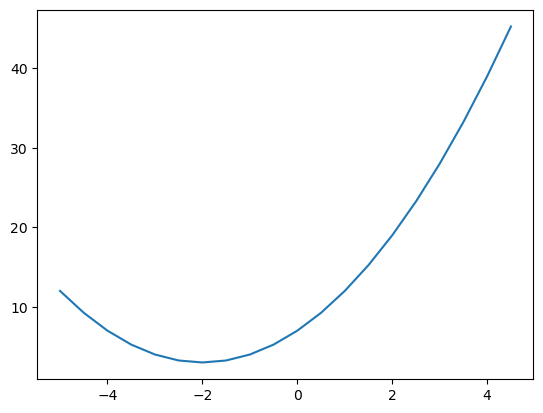

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(-5,5, 0.5)
y = x*x + 4*x + 7
print(x)
print(y)
plt.plot(x,y)

# plt.ylabel('some numbers')
plt.show()

### სავარჯიშო
##### ააგეთ გრაფიკი შემდეგი ფუნქციისთვის 2*x*x+4*x + 7

In [ ]:
import matplotlib.pyplot as plt

### სავარჯიშო
##### ააგეთ გრაფიკი შემდეგი ფუნქციისთვის 2*x*x+4*x + 7

### სავარჯიშო
##### ააგეთ გრაფიკი შემდეგი ფუნქციისთვის 2*x*x+4*x + 7Exercise - შობადობის მაჩვენებელი საქართველოში. ააგეთ შესაბამისი გრაფიკი

In [ ]:
# ### სავარჯიშო

x_points = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
y1_total = [52_442, 56_568, 55_230, 51_565, 49_969, 49_657, 60_635, 59_249, 56_569, 53_293, 51_138, 48_296]

# Lecture 4: Probability

### dice roll example - Law of Large Numbers

In [ ]:
# dice roll - simulates rolling two six-sided dice until you get a roll of both dice showing a 1.
import random
total_count = 0

while True:
    total_count += 1
    d1, d2 = random.randint(1,6), random.randint(1,6)
    print('dice 1: ', d1, "dice 2: ", d2)
    if d1 ==  1 and d2 == 1: break

print("Total count of dice rolls", total_count)


print(f"probability is 1/{total_count:.0f}")
print(f"percentage is {1/(total_count):.0%}")


In [ ]:
# dice roll - simulates rolling two six-sided dice until you get a roll of both dice showing a 1.
# მოდელის გაშვება 100-ჯერ
import random
total_count = 0
repeat_number = 100

for i in range(repeat_number):
    while True:
        total_count += 1
        d1, d2 = random.randint(1,6), random.randint(1,6)
        print('dice 1: ', d1, "dice 2: ", d2)
        if d1 ==  1 and d2 == 1: break
    print("Loop number: ", i+1)

    print("Total count of dice rolls", total_count)


print(f"probability is 1/{total_count/repeat_number:.0f}")
print(f"percentage is {1/(total_count/repeat_number):.0%}")

# Random Variables

## Discrete Random Variable

### Definition of a Random Variable

- Random variable $X$: mapping from sample space $S$ to a real line $R$
- Numerical value $X(w)$ mapped to each outcome $w$ of a particular experiment

### Probability Mass Function

- Probability Mass Function (p.m.f.): set of probability values $p_i$ assigned to each value taken by the discrete random variable $x_i$
- $ 0 \leq p_i \leq 1 \text{ and } \sum_i p_i = 1$
- Probability: $P(X = x_i) = p_i$

### Cumulative Distribution Function

- Cumulative Distribution Function (CDF): $F(x) = P(X \leq x)$

## Continuous Random Variables

### Probability Density Function

- Probability Density Function (pdf):
\begin{equation}
    f(x) \geq 0
\end{equation}
\begin{equation}
    \int_{-\infty}^{\infty} f(x) dx = 1
\end{equation}


### Cumulative Distribution Function


- Cumulative Distribution Function for continuous Random Variables:
    - $F(x) = \int_{-\infty}^x f(y) dy$
    - $f(x) = \frac{dF(x)}{dx}$
    - $P(a < X < b) = F(b) - F(a)$
    - $P(a < X < b) = P(a \leq X \leq b) = P(a \leq X < b) = P(a < X \leq b)$

 ## Probability Calculation with Python

### kaggle dataset - US Health Insurance Dataset
This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. There are no missing or undefined values in the dataset.
Link: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/
This is a demonstration of how we could utilize Python to solve probability and statistical problems, covering a simple probability, conditional probability, continous variable, categorical variable, correlation coefficient and statistical testing problem.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import norm

In [ ]:
pd.plotting.register_matplotlib_converters()
# plt.style.use("seaborn-whitegrid")
pd.set_option("display.max_columns", 500)
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Probability of Categorical Variable

$$P(E)=\frac{\text{number of event E occurs in a trial}}{\text{total trials}}$$

In [ ]:
df['smoker'].value_counts(normalize=True)


In [ ]:
filt_sm = df['smoker'] == 'yes'
n_smoker = df[filt_sm]['smoker'].count()
total = df['smoker'].count()
p = n_smoker/total
p

$$
\begin{align*}
P(A \ | \ B) &= \cfrac{n(A \cap B)}{n(B)} &= \cfrac{\text{(number of event A and B occur in a trial)}}{\text{(total number of event B)}}
\end{align*}
$$

In [ ]:
south_filt = df['region'] == 'southwest'
south_total = df[south_filt]['region'].count()
south_smoke_filt = (df['region'] == 'southwest') & (df['smoker']=='yes')
n_south_smoker = df[south_smoke_filt]['smoker'].count()
p = n_south_smoker/south_total
p

### Probability of Continous Variable

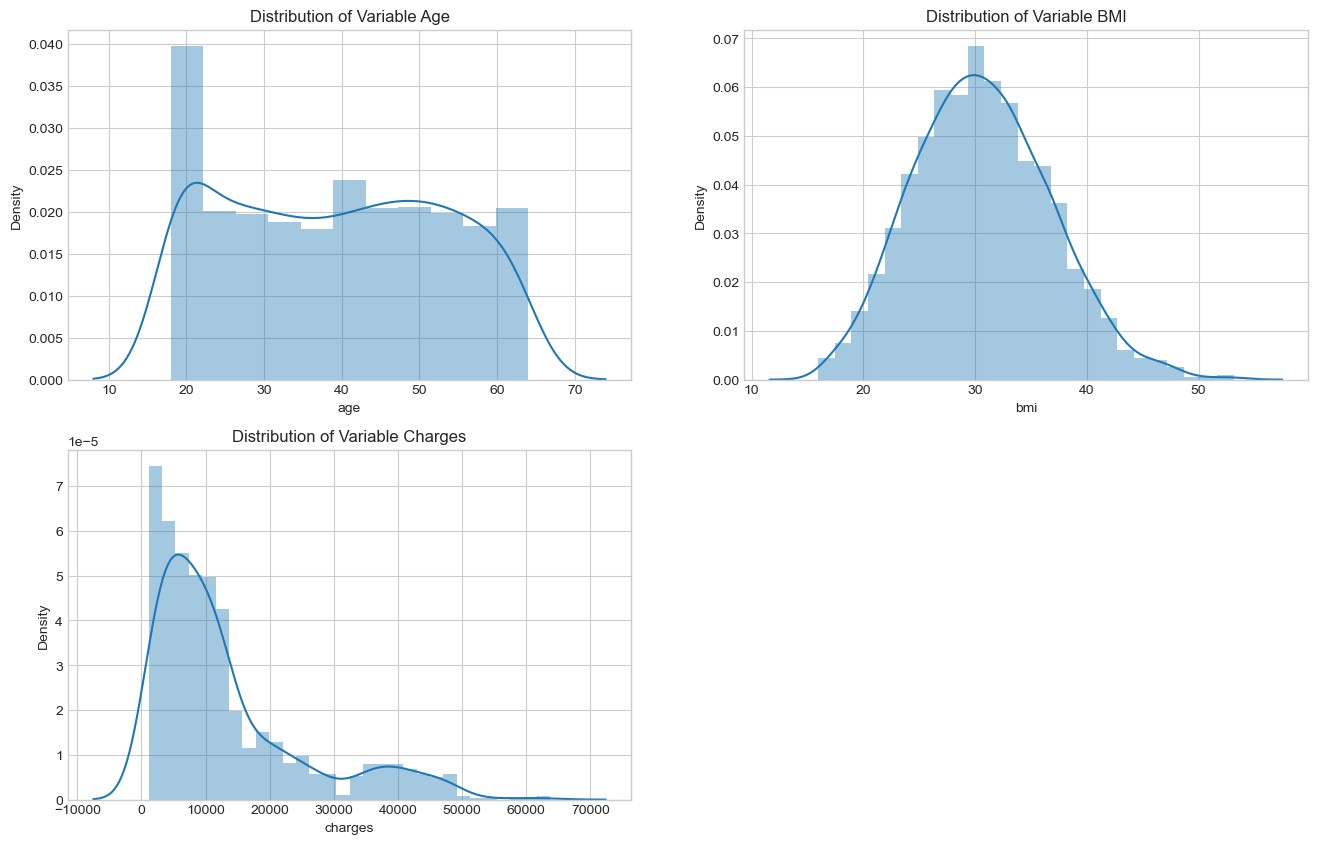

In [ ]:
fig = plt.figure(figsize=(16, 10))

plt.subplot(221)
ax1 = sns.distplot(df["age"])
plt.title(f"Distribution of Variable Age")

plt.subplot(222)
ax2 = sns.distplot(df["bmi"])
plt.title(f"Distribution of Variable BMI")

plt.subplot(223)
ax3 = sns.distplot(df["charges"])
plt.title(f"Distribution of Variable Charges")

plt.show()

In [ ]:
# Cumulative distribution function (cdf)
# cdf(x, loc=0, scale=1)
age_x = 40
age_mean = df["age"].mean()
age_std_dev = df["age"].std()
age_probability = norm.cdf(age_x, age_mean, age_std_dev)
age_probability

0.5225042071304686

In [ ]:
bmi_x = 25
bmi_mean = df["bmi"].mean()
bmi_std_dev = df["bmi"].std()
bmi_probability = norm.cdf(bmi_x, bmi_mean, bmi_std_dev)
bmi_probability

0.17652183661410764

In [ ]:
1 - bmi_probability

0.8234781633858923

## მათემატიკური ლოდინი - Expectation of a Random Variable

### Expectations of Discrete Random Variables

- Expectation of a discrete random variable $X$ with p.m.f. $p$:
\begin{equation}
    E(X) = \sum_i p_i x_i
\end{equation}



In [ ]:
# Calculate the expectation of Discrete variables

# Input
x = [1, 2, 3, 4, 5]
p = [0.2, 0.2, 0.2, 0.2, 0.2]

# Cal
exp = 0
for i, j in zip(x, p):
    exp += i * j

# Output
print('Expectation: {}'.format(exp))

Expectation: 3.0


In [ ]:
# rv_discrete() is a base class to construct specific distribution classes and instances for discrete random variables.
# It can also be used to construct an arbitrary distribution defined by a list of support points and corresponding probabilities.
from scipy.stats import rv_discrete

x = [1, 2, 3, 4, 5]
p = [0.2, 0.2, 0.2, 0.2, 0.2]
# x = [10, 20, 30]
# p = [0.2, 0.3, 0.5]
distribution = rv_discrete(values=(x, p))
print("Expected value: ", distribution.expect())

Expected value:  3.0


 ### Discrete Probability Distributions

## The Binomial Distribution

### Bernoulli Random Variables

- Modeling of a process with two possible outcomes, labeled 0 and 1
- Random variable defined by the parameter $p$, $0 \leq p \leq 1$, which is the probability that the outcome is 1
- The Bernoulli distribution $Ber(p)$ is:
\begin{equation}
    f(x;p) = p^x(1-p)^{1-x}, \text{   } x= 0,1
\end{equation}
- $E(X) = p$
- $Var(X) = p(1-p)$

In [ ]:
from scipy.stats import bernoulli
n = 4
p = 0.3 # probability of success
print("Mean: ", bernoulli.mean(p))
print("Variance: ", bernoulli.var(p))

Mean:  0.3
Variance:  0.21


### Definition of the Binomial Distribution

- Let's consider and experiment consisting of $n$ Bernoulli trials $X_1, \cdots, X_n$ independent and with a constant probability $p$ of success
- Then the total number of successes $X = \sum_{i=1}^m X_i$ is a random variable whose Binomial distribution with parameters $n$ (number of trials) and $p$ is:
\begin{equation}
    X \sim B(n,p)
\end{equation}

- Probability mass function of a $B(n, p)$ random variable is:
\begin{equation}
    f(x;n,p) = \binom{n}{x}p^x(1-p)^{n-x}, \text{   } x= 0,1, \cdots, n
\end{equation}
- $E(X) = np$
- $Var(X) = np(1-p)$

In [ ]:
from scipy.stats import binom

# Parameters
n = 10 # number of trials
x = 7 # number of successes
p = 0.2 # probability of success

print("Mean: ", binom.mean(n, p))
print("Variance: ", binom.var(n, p))
print("Probability mass function: ", binom.pmf(x, n, p))
print("Cumulative distribution function: ", binom.cdf(x,n,p))

Mean:  2.0
Variance:  1.6
Probability mass function:  0.000786432
Cumulative distribution function:  0.9999220736


## Descriptive Statistics

### kaggle dataset - US Health Insurance Dataset
This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. There are no missing or undefined values in the dataset.
Link: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/
This is a demonstration of how we could utilize Python to solve probability and statistical problems, covering a simple probability, conditional probability, continous variable, categorical variable, correlation coefficient and statistical testing problem.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import norm

In [ ]:
# pd.plotting.register_matplotlib_converters()
# # plt.style.use("seaborn-whitegrid")
# pd.set_option("display.max_columns", 500)
# warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<AxesSubplot:xlabel='age'>

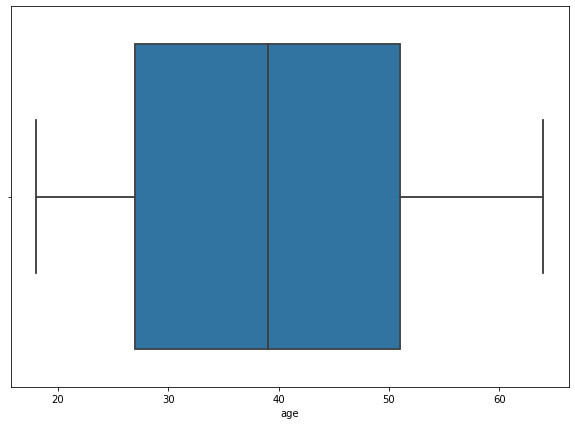

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
# plt.boxplot(data)
# plt.show()

sns.boxplot(x = df['age'])
sns.boxplot(data=df, x="age")
# plt.title('Monthly income of Gym members')
# plt.show()

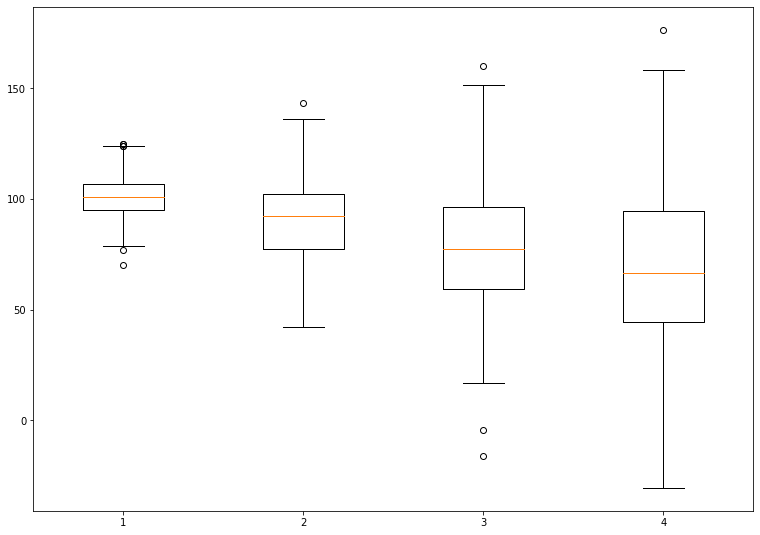

In [ ]:

# Import libraries
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
np.random.seed(10)

data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

In [ ]:

# Python program to display variance of data groups

# Import library
import numpy as np
import scipy.stats as stats

# Creating data groups
data_group1 = np.array([14, 15, 15, 16, 13, 8, 14,
                        17, 16, 14, 19, 20, 21, 15,
                        15, 16, 16, 13, 14, 12])
data_group2 = np.array([15, 17, 14, 17, 14, 8, 12,
                        19, 19, 14, 17, 22, 24, 16,
                        13, 16, 13, 18, 15, 13])

# Print the variance of both data groups
print(np.var(data_group1), np.var(data_group2))

7.727500000000001 12.260000000000002


#  t-test

### Very rarely we know the variance of the population.

A common strategy to assess hypothesis is to conduct a t test. A t test can tell whether two groups have the same mean.
A t test can be estimated for:
* 1) One sample t test
* 2) Two sample t test (including paired t test)

We assume that the samples are randomly selected, independent and come from a normally distributed population with unknown but equal variances.

## One sample t test

In [ ]:
from scipy.stats             import ttest_1samp,ttest_ind,ttest_rel, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt
import numpy as np

### Example 2

Suppose that a doctor claims that 17 year olds have an average body temperature that is higher than the commonly accepted average human temperature of 98.6 degree F.

A simple random statistical sample of 25 people, each of age 17 is selected.

| ID | Temperature |
| --- | ----- |
| 1 | 98.56 |
| 2 | 98.66 |
| 3 | 99.54 |
| 4 | 98.71 |
| 5 | 99.22 |
| 6 | 99.49 |
| 7 | 98.14 |
| 8 | 99.84 |
| 9 | 99.28 |
| 10 | 98.78 |
| 11 | 98.88 |
| 12 | 98.29 |
| 13 | 98.88 |
| 14 | 99.07 |
| 15 | 98.81 |
| 16 | 99.49 |
| 17 | 98.57 |
| 18 | 98.98 |
| 19 | 98.75 |
| 20 | 98.69 |
| 21 | 99.28 |
| 22 | 98.52 |
| 23 | 98.82 |
| 24 | 98.81 |
| 25 | 98.22 |


In [ ]:
temperature = np.array([98.56, 98.66, 99.54, 98.71, 99.22, 99.49, 98.14, 99.84,\
                         99.28, 98.78, 98.88, 98.29, 98.88, 99.07, 98.81, 99.49,\
                         99.57, 98.98, 98.75, 98.69, 99.28, 98.92, 98.82, 99.81, 98.22])

In [ ]:
print('Mean is %2.1f Sd is %2.1f' % (temperature.mean(),np.std(temperature,ddof = 1)))

Mean is 99.0 Sd is 0.5


### Step 1: Define null and alternative hypotheses

In testing whether 17 year olds have an average body temperature that is higher than 98.6 deg F,the null hypothesis states that mean bdy temperature, $\mu$ equals 98.6. The alternative hypthesis states that the mean body temprature, $\mu$ is greater  than 98.6.

* $H_0$: $\mu$ <= 98.6
* $H_A$: $\mu$ > 98.6

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 and it is given that n, sample size = 25.

### Step 3: Identify the test statistic

We do not know the population standard deviation and the sample is not a large sample, n < 30. So you use the t distribution and the $t_STAT$ test statistic.

### Step 4: Calculate the p - value and test statistic

**scipy.stats.ttest_1samp calculates the t test for the mean of one sample given the sample observations and  the expected value in the null hypothesis. This function returns t statistic and two-tailed p value.**

In [ ]:
t_statistic, pvalue = ttest_1samp(temperature, 98.6)

In [ ]:
t_statistic

4.150860327296973

In [ ]:
pvalue

0.0003596528925227204

### Step 5 Decide to reject or accept null hypothesis

In this example, p value is 0.0003 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is sufficient evidence  to prove that 17 year olds have an average body temperature that is higher than the commonly accepted average human temperature of 98.6 degree F.

## Two sample T-Test in Python
Let us consider an example, we are given two-sample data, each containing heights of 15 students of a class. We need to check whether two different class students have the same mean height. There are three ways to conduct a two-sample T-Test in Python.

Method 1: Using Scipy library
Scipy stands for scientific python and as the name implies it is a scientific python library and it uses Numpy under the cover. This library provides a variety of functions that can be quite useful in data science. Firstly, let’s create the sample data. Now let’s perform two sample T-Test. For this purpose, we have ttest_ind() function in Python.

Syntax: ttest_ind(data_group1, data_group2, equal_var=True/False)

Here,

data_group1: First data group
data_group2: Second data group
equal_var = “True”: The standard independent two sample t-test will be conducted by taking into consideration the equal population variances.
equal_var = “False”: The Welch’s t-test will be conducted by not taking into consideration the equal population variances.


In [ ]:
# Creating data groups
data_group1 = np.array([14, 15, 15, 16, 13, 8, 14,
                        17, 16, 14, 19, 20, 21, 15,
                        15, 16, 16, 13, 14, 12])

data_group2 = np.array([15, 17, 14, 17, 14, 8, 12,
                        19, 19, 14, 17, 22, 24, 16,
                        13, 16, 13, 18, 15, 13])
print(data_group1.mean(), data_group2.mean())

# Perform the two sample t-test with equal variances
ttest_ind(data_group1, data_group2)

15.15 15.8


Ttest_indResult(statistic=-0.6337397070250238, pvalue=0.5300471010405257)

### Analyzing the result:

Two sample t-test has the following hypothesis:

H0 => µ1 = µ2 (population mean of dataset1 is equal to dataset2)

HA => µ1 ≠µ2 (population mean of dataset1 is different from dataset2)

Here, since the p-value (0.53004) is greater than alpha = 0.05 so we cannot reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height of students between the two data groups is different.

# Paired Samples T-Test

Paired sample T-test: This test is also known as the dependent sample t-test. It is a statistical concept and is used to check whether the mean difference between the two sets of observation is equal to zero.  Each entity is measured is two times in this test that results in the pairs of observations.

### How to conduct a paired samples T-Test in Python?
Let us consider that we want to know whether an engine oil significantly impacts the car’s mileage of different brands. In order to test this, we have 10 cars in a garage doped with original engine oil initially. We have noted their mileage for 100 kilometers each. Then, we have each of the cars doped with another engine oil (different from the original one). Then, the mileage of the cars is calculated for 100 kilometers each. To compare the difference between the mean mileage of the first and second test, we use a paired samples t-test because for each car their first test score can be paired with their second test score. Conducting paired sample T-test is a step-by-step process.

### Step 1: Construct the data

In [ ]:
# pre holds the mileage before applying
# the different engine oil
pre = np.array([88, 82, 84, 93, 75, 78, 84, 87,
       95, 91, 83, 89, 77, 68, 91])

# post holds the mileage before applying
# the different engine oil
post = np.array([91, 84, 88, 90, 79, 80, 88, 90,
        90, 96, 88, 89, 81, 74, 92])

In [ ]:
pre.mean()

84.33333333333333

In [ ]:
post.mean()

86.66666666666667

### Step 2: Conducting a paired-sample T-test.

Scipy library contains ttest_rel() function using which we can conduct the paired samples t-test in Python. The syntax is given below,

In [ ]:
# Performing the paired sample t-test
ttest_rel(pre, post)

TtestResult(statistic=-2.9732484231168796, pvalue=0.01007144862643272, df=14)

### Step 3: Analyzing the output.

The paired samples t-test follows the null and alternative hypotheses:

H0: It signifies that the mean pre-test and post-test scores are equal

HA: It signifies that the mean pre-test and post-test scores are not equal

As the p-value comes out to be equal to 0.029 which is less than 0.05 hence we reject the null hypothesis. So, we have enough proof to claim that the true mean test score is different for cars before and after applying the different engine oil.

# Data Cleaning in Pandas

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("Customer Call List.xlsx")
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


### drop_duplicates() Function
Return DataFrame with duplicate rows removed.


In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


### drop() Function
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding axis, or by directly specifying index or column names. When using a multi-index, labels on different levels can be removed by specifying the level. See the user guide for more information about the now unused levels.

In [ ]:
df.drop(columns='Not_Useful_Column', inplace=True)


C:\Users\student\AppData\Local\Temp\ipykernel_12736\1625107227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Not_Useful_Column', inplace=True)


In [ ]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


### str.strip(characters)
The strip() method removes any leading (beginning), and trailing(ending) whitespaces.

You can specify which character(s) to remove, if not, any whitespaces will be removed.

In [ ]:
df['Last_Name'] = df['Last_Name'].str.lstrip('/')
df['Last_Name'] = df['Last_Name'].str.strip('123._')
df

C:\Users\student\AppData\Local\Temp\ipykernel_12736\219638387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last_Name'] = df['Last_Name'].str.lstrip('/')
C:\Users\student\AppData\Local\Temp\ipykernel_12736\219638387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last_Name'] = df['Last_Name'].str.strip('123._')


,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


### DataFrame.apply() function
Pandas DataFrame apply() function is used to apply a function along an axis of the DataFrame. The function syntax is:

def apply(func, axis=0, broadcast=None, raw=False, reduce=None, result_type=None, args=(), **kwds)


func: The function to apply to each row or column of the DataFrame.
axis: axis along which the function is applied. The possible values are {0 or ‘index’, 1 or ‘columns’}, default 0.
args: The positional arguments to pass to the function. This is helpful when we have to pass additional arguments to the function.
kwargs: additional keyword arguments to pass to the function. This is helpful when we have to pass additional keyword arguments to the function.



In [ ]:
df_new = pd.DataFrame({'A': [1, 2], 'B': [10, 20]})

def square(x):

    return x * x


df1 = df_new.apply(square)
df1 = df_new.apply(lambda x: x*x)

print(df_new)
print(df1)

   A   B
0  1  10
1  2  20
   A    B
0  1  100
1  4  400


In [ ]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [ ]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


In [ ]:
df['Phone_Number'] = df['Phone_Number'].str.replace('-', '')
df['Phone_Number'] = df['Phone_Number'].str.replace('[^a-zA-Z0-9]', '')
df['Phone_Number'] = df['Phone_Number'].apply(lambda x: str(x))
df['Phone_Number'] = df['Phone_Number'].apply(lambda x: x[0:3] + '-' + x[3:6] + '-' + x[6:] )


C:\Users\student\AppData\Local\Temp\ipykernel_12736\2966699295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Phone_Number'] = df['Phone_Number'].str.replace('-', '')
C:\Users\student\AppData\Local\Temp\ipykernel_12736\2966699295.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Phone_Number'] = df['Phone_Number'].str.replace('[^a-zA-Z0-9]', '')
C:\Users\student\AppData\Local\Temp\ipykernel_12736\2966699295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [ ]:
df['Phone_Number'] = df['Phone_Number'].str.replace('nan--', '')
df['Phone_Number'] = df['Phone_Number'].str.replace('Na--', '')

C:\Users\student\AppData\Local\Temp\ipykernel_12736\3746123081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Phone_Number'] = df['Phone_Number'].str.replace('nan--', '')
C:\Users\student\AppData\Local\Temp\ipykernel_12736\3746123081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Phone_Number'] = df['Phone_Number'].str.replace('Na--', '')


In [ ]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123-643-9775,93 West Main Street,No,Yes
2,1003,Walter,White,,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,,1209 South Street,No,No
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


### DataFrame.fillna()
Fill NA/NaN values using the specified method.

In [ ]:
df = df.replace('N/a', '')
df = df.replace('NaN', '')

import numpy as np
df = df.replace(np.nan, '')

df = df.replace('', np.nan)

In [ ]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123-643-9775,93 West Main Street,No,Yes
2,1003,Walter,White,NaN,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876-678-3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876-678-3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,NaN,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No
